In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [133]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 150

In [134]:
!dir "../data/processed_raw/sentinel_bands"

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: CAD2-CEC1

 Directorio de C:\Users\camil\codes\backup_tesis\tesis\data\processed_raw\sentinel_bands

31/05/2021  06:37 p.ÿm.    <DIR>          .
31/05/2021  06:37 p.ÿm.    <DIR>          ..
31/05/2021  06:37 p.ÿm.    <DIR>          .ipynb_checkpoints
31/05/2021  06:37 p.ÿm.    <DIR>          PixEx
30/04/2021  12:18 a.ÿm.         2.886.387 S2A_MSIL2A_20160110T152632_N0201_R025_T18NXM_20160110T153105_processed.csv
30/04/2021  12:28 a.ÿm.         2.886.387 S2A_MSIL2A_20160110T152632_N0201_R025_T18NXM_20160110T153105_PROCESSED_SOIL.csv
30/04/2021  12:28 a.ÿm.            80.409 S2A_MSIL2A_20160110T152632_N0201_R025_T18NXM_20160110T153105_PROCESSED_VEGETATION.csv
               3 archivos      5.853.183 bytes
               4 dirs  556.812.951.552 bytes libres


In [135]:
sat_sentinel_data_unprocessed = r'../data/processed_raw/sentinel_bands/S2A_MSIL2A_20160110T152632_N0201_R025_T18NXM_20160110T153105_processed.csv'
df_temp = pd.read_csv(sat_sentinel_data_unprocessed, sep=';')
print(df_temp.shape)
df_temp.head()

(653, 325)


,X,Y,lon,lat,departamento,municipio,cultivo,topografia,pH,OM,Ca,Mg,K,Na,400,408.5,417,425.5,434,442.5,451,459.5,468,476.5,485,493.5,502,510.5,519,527.5,536,544.5,553,561.5,570,578.5,587,595.5,604,612.5,621,629.5,638,646.5,655,663.5,672,680.5,689,697.5,706,714.5,723,731.5,740,748.5,757,765.5,774,782.5,791,799.5,808,816.5,825,833.5,842,850.5,859,867.5,876,884.5,893,901.5,910,918.5,927,935.5,944,952.5,961,969.5,978,986.5,995,1003.5,1012,1020.5,1029,1037.5,1046,1054.5,1063,1071.5,1080,1088.5,1097,1105.5,1114,1122.5,1131,1139.5,1148,1156.5,1165,1173.5,1182,1190.5,1199,1207.5,1216,1224.5,1233,1241.5,1250,1258.5,1267,1275.5,1284,1292.5,1301,1309.5,1318,1326.5,1335,1343.5,1352,1360.5,1369,1377.5,1386,1394.5,1403,1411.5,1420,1428.5,1437,1445.5,1454,1462.5,1471,1479.5,1488,1496.5,1505,1513.5,1522,1530.5,1539,1547.5,1556,1564.5,1573,1581.5,1590,1598.5,1607,1615.5,1624,1632.5,1641,1649.5,1658,1666.5,1675,1683.5,1692,1700.5,1709,1717.5,1726,1734.5,1743,1751.5,1760,1768.5,1777,1785.5,1794,1802.5,1811,1819.5,1828,1836.5,1845,1853.5,1862,1870.5,1879,1887.5,1896,1904.5,1913,1921.5,1930,1938.5,1947,1955.5,1964,1972.5,1981,1989.5,1998,2006.5,2015,2023.5,2032,2040.5,2049,2057.5,2066,2074.5,2083,2091.5,2100,2108.5,2117,2125.5,2134,2142.5,2151,2159.5,2168,2176.5,2185,2193.5,2202,2210.5,2219,2227.5,2236,2244.5,2253,2261.5,2270,2278.5,2287,2295.5,2304,2312.5,2321,2329.5,2338,2346.5,2355,2363.5,2372,2380.5,2389,2397.5,2406,2414.5,2423,2431.5,2440,2448.5,2457,2465.5,2474,2482.5,2491,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,quality_aot,quality_wvp,quality_cloud_confidence,quality_snow_confidence,quality_scene_classification,view_zenith_mean,view_azimuth_mean,sun_zenith,sun_azimuth,view_zenith_B1,view_azimuth_B1,view_zenith_B2,view_azimuth_B2,view_zenith_B3,view_azimuth_B3,view_zenith_B4,view_azimuth_B4,view_zenith_B5,view_azimuth_B5,view_zenith_B6,view_azimuth_B6,view_zenith_B7,view_azimuth_B7,view_zenith_B8,view_azimuth_B8,view_zenith_B8A,view_azimuth_B8A,view_zenith_B9,view_azimuth_B9,view_zenith_B10,view_azimuth_B10,view_zenith_B11,view_azimuth_B11,view_zenith_B12,view_azimuth_B12,CloudMask,NDVI,GNDVI,EVI,AVI,SAVI,NDMI,MSI,GCI,NBR,BSI,NDWI,NDSI,NDGI,ARVI,SIPI,quality_classification
0,2071,3162,-73.513627,5.914703,BOYACA,TOGUI,PRADERAS,PENDIENTE,4.70,3.011138,0.481978,0.213796,0.171674,0.146597,0.864947,0.875096,0.874840,0.865835,0.851385,0.838967,0.833089,0.831834,0.829409,0.821083,0.804732,0.781411,0.754565,0.726855,0.699120,0.671711,0.645430,0.620700,0.597969,0.578164,0.561325,0.547276,0.535821,0.526254,0.517484,0.508804,0.500029,0.490974,0.481710,0.472552,0.463779,0.455267,0.446919,0.438797,0.430990,0.423477,0.416262,0.409397,0.402926,0.396867,0.391249,0.386078,0.381368,0.377009,0.372938,0.369263,0.365900,0.362648,0.359597,0.357002,0.354811,0.352839,0.351035,0.349361,0.347768,0.346174,0.344563,0.342890,0.341143,0.339336,0.337482,0.335549,0.333536,0.331486,0.329428,0.327349,0.325065,0.322451,0.319854,0.317311,0.314750,0.312152,0.309510,0.306817,0.304093,0.301341,0.298579,0.295792,0.292908,0.289999,0.287228,0.284353,0.283089,0.281201,0.278312,0.275537,0.272863,0.270239,0.267772,0.265380,0.262955,0.260540,0.258260,0.256150,0.254174,0.252268,0.250496,0.248873,0.247394,0.245920,0.244449,0.243111,0.241952,0.240966,0.240199,0.239586,0.239062,0.238526,0.238026,0.237610,0.237241,0.237179,0.237467,0.238237,0.241019,0.247080,0.254199,0.262838,0.273027,0.271430,0.258304,0.252329,0.250347,0.249300,0.248436,0.247419,0.246041,0.244631,0.243330,0.242029,0.240771,0.239711,0.238736,0.237905,0.237270,0.236672,0.236050,0.235446,0.234947,0.234472,0.234067,0.233801,0.233743,0.233541,0.233192,0.233031,0.233040,0.233175,0.233203,0.233368,0.233545,0.233639,0.233758,0.234119,0.234678,0.235347,0.235903,0.236424,0.237248,0.237944,0.238584,0.239172,0.239647,0.240043,0.240303,0.240356,0.240381,0.240431,0.240561,0.240843,0.241173,0.242149,0.244453,0.249967,0.259104,0.273321,0.293150,0.311237,0.319497,0.320590,0.318971,0.316020,0.312332,0.308365,0.304471,0.300706,0.296996,0.293401

In [136]:
df_temp[df_temp['quality_classification'] == 'NOT_VEGETATION'][['pH', 'OM', 'Ca', 'Mg', 'K', 'Na']]

,pH,OM,Ca,Mg,K,Na
88,6.65,9.539340,34.552011,1.283865,0.319940,0.088900
137,4.84,3.277188,5.268932,0.860074,0.236551,0.218843
152,6.81,4.491411,22.106216,1.298166,0.276951,0.329939
251,6.56,3.996831,17.073114,1.058844,0.119232,0.161812
271,4.42,6.835504,1.179035,0.132695,0.169423,0.108512
291,6.01,8.122747,21.061016,0.877271,0.395283,0.518735
293,5.07,6.591004,1.015667,0.683207,0.717473,0.482947
306,6.83,10.804155,11.566047,2.540575,0.719893,0.440652
350,4.55,7.414472,1.834701,0.477195,0.212412,0.604856
400,4.59,5.388757,1.682642,0.685199,0.219220,0.216546


In [137]:
sat_sentinel_data = r'../data/interim_raw/sentinel2_all/satellite_sentinel2_all.csv'
sat_sim_sentinel_data = r'../data/interim_raw/sentinel2_simulated/satellite_sentinel2_simulated.csv'

In [138]:
df_sim_sentinel = pd.read_csv(sat_sim_sentinel_data, sep=';')

print(df_sim_sentinel.shape)
df_sim_sentinel.head()

(653, 18)


,pH,OM,Ca,Mg,K,Na,B1_443.9,B2_496.6,B3_560.0,B4_664.5,B5_703.9,B6_740.2,B7_782.5,B8_835.1,B8A_864.8,B9_945.0,B11_1613.7,B12_2202.4
0,4.70,3.011138,0.481978,0.213796,0.171674,0.146597,0.844222,0.742902,0.594799,0.455716,0.420031,0.391398,0.369552,0.357787,0.346151,0.329373,0.234380,0.312788
1,5.00,12.271341,1.287727,0.418722,0.421729,0.201236,1.084577,1.024587,0.924741,0.771936,0.721580,0.679715,0.639911,0.605115,0.577240,0.531714,0.346386,0.432581
2,5.07,5.326189,3.592768,0.533857,0.213425,0.176261,0.863350,0.785385,0.674149,0.543348,0.503266,0.469970,0.440225,0.420608,0.402748,0.377293,0.251452,0.300813
3,4.55,7.198116,1.198907,0.452394,0.428312,0.220661,1.047152,0.976819,0.870760,0.734812,0.693970,0.661369,0.633083,0.610929,0.592339,0.563219,0.433349,0.475339
4,4.44,4.643188,2.353349,0.526435,0.336426,0.173677,0.910143,0.827656,0.699175,0.537009,0.491197,0.453930,0.423285,0.403942,0.385648,0.361293,0.247524,0.295509


In [139]:
df_sentinel = pd.read_csv(sat_sentinel_data, sep=';')
print(df_sentinel.shape)
df_sentinel.columns = df_sim_sentinel.columns
df_sentinel.head()

(607, 18)


,pH,OM,Ca,Mg,K,Na,B1_443.9,B2_496.6,B3_560.0,B4_664.5,B5_703.9,B6_740.2,B7_782.5,B8_835.1,B8A_864.8,B9_945.0,B11_1613.7,B12_2202.4
0,4.70,3.011138,0.481978,0.213796,0.171674,0.146597,0.0034,0.0099,0.0324,0.0249,0.0632,0.1954,0.2388,0.2854,0.2777,0.2969,0.1356,0.0579
1,5.00,12.271341,1.287727,0.418722,0.421729,0.201236,0.0001,0.0109,0.0413,0.0331,0.0947,0.2397,0.2881,0.2968,0.3334,0.3025,0.1763,0.0828
2,5.07,5.326189,3.592768,0.533857,0.213425,0.176261,0.0029,0.0114,0.0404,0.0312,0.0795,0.2079,0.2486,0.2629,0.2728,0.2971,0.1621,0.0833
3,4.55,7.198116,1.198907,0.452394,0.428312,0.220661,0.0063,0.0146,0.0531,0.0318,0.0891,0.2742,0.3251,0.3946,0.3670,0.2933,0.1736,0.0795
4,4.44,4.643188,2.353349,0.526435,0.336426,0.173677,0.0010,0.0020,0.0178,0.0157,0.0476,0.1580,0.1912,0.1848,0.2066,0.2519,0.0977,0.0480


In [140]:
df_merge = pd.merge(
    df_sentinel.round(6), df_sim_sentinel.round(6),
    on=['pH', 'OM', 'Ca', 'Mg', 'K', 'Na'],
    how='left', suffixes=['_sen', '_simsen']
)

In [141]:
df_merge.columns

Index(['pH', 'OM', 'Ca', 'Mg', 'K', 'Na', 'B1_443.9_sen', 'B2_496.6_sen',
       'B3_560.0_sen', 'B4_664.5_sen', 'B5_703.9_sen', 'B6_740.2_sen',
       'B7_782.5_sen', 'B8_835.1_sen', 'B8A_864.8_sen', 'B9_945.0_sen',
       'B11_1613.7_sen', 'B12_2202.4_sen', 'B1_443.9_simsen',
       'B2_496.6_simsen', 'B3_560.0_simsen', 'B4_664.5_simsen',
       'B5_703.9_simsen', 'B6_740.2_simsen', 'B7_782.5_simsen',
       'B8_835.1_simsen', 'B8A_864.8_simsen', 'B9_945.0_simsen',
       'B11_1613.7_simsen', 'B12_2202.4_simsen'],
      dtype='object')

In [142]:
df_merge.head(10)

,pH,OM,Ca,Mg,K,Na,B1_443.9_sen,B2_496.6_sen,B3_560.0_sen,B4_664.5_sen,B5_703.9_sen,B6_740.2_sen,B7_782.5_sen,B8_835.1_sen,B8A_864.8_sen,B9_945.0_sen,B11_1613.7_sen,B12_2202.4_sen,B1_443.9_simsen,B2_496.6_simsen,B3_560.0_simsen,B4_664.5_simsen,B5_703.9_simsen,B6_740.2_simsen,B7_782.5_simsen,B8_835.1_simsen,B8A_864.8_simsen,B9_945.0_simsen,B11_1613.7_simsen,B12_2202.4_simsen
0,4.70,3.011138,0.481978,0.213796,0.171674,0.146597,0.0034,0.0099,0.0324,0.0249,0.0632,0.1954,0.2388,0.2854,0.2777,0.2969,0.1356,0.0579,0.844222,0.742902,0.594799,0.455716,0.420031,0.391398,0.369552,0.357787,0.346151,0.329373,0.234380,0.312788
1,5.00,12.271341,1.287727,0.418722,0.421729,0.201236,0.0001,0.0109,0.0413,0.0331,0.0947,0.2397,0.2881,0.2968,0.3334,0.3025,0.1763,0.0828,1.084577,1.024587,0.924741,0.771936,0.721580,0.679715,0.639911,0.605115,0.577240,0.531714,0.346386,0.432581
2,5.07,5.326189,3.592768,0.533857,0.213425,0.176261,0.0029,0.0114,0.0404,0.0312,0.0795,0.2079,0.2486,0.2629,0.2728,0.2971,0.1621,0.0833,0.863350,0.785385,0.674149,0.543348,0.503266,0.469970,0.440225,0.420608,0.402748,0.377293,0.251452,0.300813
3,4.55,7.198116,1.198907,0.452394,0.428312,0.220661,0.0063,0.0146,0.0531,0.0318,0.0891,0.2742,0.3251,0.3946,0.3670,0.2933,0.1736,0.0795,1.047152,0.976819,0.870760,0.734812,0.693970,0.661369,0.633083,0.610929,0.592339,0.563219,0.433349,0.475339
4,4.44,4.643188,2.353349,0.526435,0.336426,0.173677,0.0010,0.0020,0.0178,0.0157,0.0476,0.1580,0.1912,0.1848,0.2066,0.2519,0.0977,0.0480,0.910143,0.827656,0.699175,0.537009,0.491197,0.453930,0.423285,0.403942,0.385648,0.361293,0.247524,0.295509
5,6.28,4.415522,12.635731,0.875099,0.240546,0.230039,0.0092,0.0165,0.0431,0.0362,0.0770,0.1462,0.1836,0.2464,0.1911,0.2503,0.1416,0.0829,0.798430,0.726681,0.629894,0.521547,0.488492,0.460595,0.436158,0.419112,0.403760,0.382559,0.296777,0.325533
6,6.26,4.668485,13.176117,0.722310,0.305985,0.154539,0.0119,0.0253,0.0623,0.0570,0.1161,0.2396,0.2699,0.2849,0.3139,0.3378,0.2501,0.1344,0.900646,0.808687,0.674165,0.543093,0.503864,0.470917,0.446141,0.436107,0.424444,0.409709,0.300668,0.379063
7,4.69,8.108783,1.606228,0.475566,0.530551,0.132435,0.0087,0.0174,0.0499,0.0342,0.0864,0.2314,0.2791,0.3369,0.3077,0.2781,0.1739,0.0837,1.003574,0.926013,0.803747,0.650387,0.601772,0.562067,0.528163,0.505436,0.484766,0.455311,0.316194,0.399112
8,4.96,8.842376,4.406531,0.582374,0.450707,0.229273,0.0206,0.0231,0.0532,0.0431,0.1008,0.2307,0.2754,0.2940,0.3074,0.3111,0.2229,0.1157,0.981666,0.914924,0.805914,0.651475,0.599343,0.554790,0.514189,0.481755,0.454325,0.413521,0.261518,0.342024
9,4.66,3.125410,2.570184,0.470678,0.281509,0.148607,0.0046,0.0172,0.0344,0.0380,0.0952,0.1775,0.2285,0.1987,0.2526,0.2537,0.1677,0.0916,0.928713,0.851797,0.730510,0.583558,0.541841,0.509164,0.483404,0.467572,0.452941,0.430821,0.320678,0.358497


In [143]:
df_merge.shape

(607, 30)

In [144]:
df_sentinel.describe()

,pH,OM,Ca,Mg,K,Na,B1_443.9,B2_496.6,B3_560.0,B4_664.5,B5_703.9,B6_740.2,B7_782.5,B8_835.1,B8A_864.8,B9_945.0,B11_1613.7,B12_2202.4
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,5.737068,6.731000,11.121205,0.928782,0.315210,0.260423,0.021620,0.027451,0.055036,0.046115,0.091539,0.219164,0.263474,0.277531,0.293859,0.292674,0.183273,0.095430
std,1.162935,2.947969,13.602598,0.680463,0.214787,0.224106,0.022067,0.018812,0.020922,0.025433,0.026541,0.040572,0.048696,0.055657,0.053503,0.050529,0.051270,0.038852
min,4.080000,0.686549,0.171492,0.006336,0.018343,0.005650,0.000100,0.000700,0.014800,0.013700,0.032300,0.066100,0.078000,0.091200,0.086600,0.084700,0.051200,0.023700
25%,4.765000,4.545622,2.116038,0.401706,0.191705,0.113967,0.010150,0.016500,0.042600,0.030100,0.075300,0.194550,0.234300,0.246450,0.262950,0.264450,0.150350,0.070100
50%,5.370000,6.250623,4.674529,0.757067,0.260296,0.188605,0.017200,0.024000,0.051600,0.039500,0.088000,0.217900,0.262600,0.275900,0.293800,0.293600,0.176500,0.087200
75%,6.585000,8.215144,16.294208,1.283141,0.356120,0.313241,0.026400,0.032050,0.062550,0.052500,0.103700,0.244850,0.295500,0.312200,0.326550,0.323200,0.207300,0.108450
max,8.410000,19.461802,93.542837,5.928189,2.003028,1.409322,0.240500,0.215900,0.199600,0.191700,0.255700,0.365500,0.404400,0.445800,0.460600,0.462000,0.421300,0.281900


In [145]:
df_sim_sentinel.describe()

,pH,OM,Ca,Mg,K,Na,B1_443.9,B2_496.6,B3_560.0,B4_664.5,B5_703.9,B6_740.2,B7_782.5,B8_835.1,B8A_864.8,B9_945.0,B11_1613.7,B12_2202.4
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,5.753369,6.675486,11.373962,0.922545,0.312264,0.253987,1.048605,0.987786,0.887115,0.748114,0.701024,0.658553,0.618427,0.585822,0.559087,0.515580,0.327501,0.391043
std,1.175435,2.926594,13.736514,0.673077,0.209984,0.218945,0.089735,0.101239,0.115728,0.119569,0.118050,0.115508,0.110657,0.102158,0.097538,0.087346,0.061096,0.054614
min,4.020000,0.414698,0.171492,0.006336,0.018343,0.005650,0.733904,0.661945,0.570429,0.452024,0.415394,0.384653,0.361879,0.356140,0.346151,0.329373,0.206493,0.255830
25%,4.760000,4.535881,2.115763,0.401706,0.191986,0.111766,0.984137,0.916137,0.803618,0.657832,0.610624,0.569363,0.533056,0.508981,0.486178,0.447884,0.286457,0.353413
50%,5.380000,6.168676,4.761043,0.749283,0.259677,0.183342,1.047239,0.983335,0.881956,0.741322,0.696330,0.652139,0.612775,0.581312,0.553346,0.508599,0.319796,0.385149
75%,6.640000,8.184672,17.143160,1.279701,0.351619,0.306495,1.111659,1.059957,0.965784,0.833947,0.787668,0.743300,0.697101,0.656986,0.623925,0.570834,0.358714,0.421487
max,8.410000,19.461802,93.542837,5.928189,2.003028,1.409322,1.369170,1.346947,1.270346,1.111023,1.060515,1.011952,0.958889,0.905853,0.891136,0.861000,0.691936,0.654504


In [146]:
df_sim_sentinel.columns[6:]

Index(['B1_443.9', 'B2_496.6', 'B3_560.0', 'B4_664.5', 'B5_703.9', 'B6_740.2',
       'B7_782.5', 'B8_835.1', 'B8A_864.8', 'B9_945.0', 'B11_1613.7',
       'B12_2202.4'],
      dtype='object')

In [147]:
cols = df_sentinel.columns[6:]
cols2 = df_sim_sentinel.columns[6:]
print(cols)
print(cols2)

Index(['B1_443.9', 'B2_496.6', 'B3_560.0', 'B4_664.5', 'B5_703.9', 'B6_740.2',
       'B7_782.5', 'B8_835.1', 'B8A_864.8', 'B9_945.0', 'B11_1613.7',
       'B12_2202.4'],
      dtype='object')
Index(['B1_443.9', 'B2_496.6', 'B3_560.0', 'B4_664.5', 'B5_703.9', 'B6_740.2',
       'B7_782.5', 'B8_835.1', 'B8A_864.8', 'B9_945.0', 'B11_1613.7',
       'B12_2202.4'],
      dtype='object')


In [148]:
for col in cols:
    col1 = f"{col}_sen"
    col2 = f"{col}_simsen"
    col3 = f"{col}_diff"
    
    df_merge[col3] = np.sqrt((df_merge[col1] - df_merge[col2])**2)

## All data

[0.0034 0.0099 0.0324 0.0249 0.0632 0.1954 0.2388 0.2854 0.2777 0.2969
 0.1356 0.0579]
[0.655778 0.757098 0.905201 1.044284 1.079969 1.108602 1.130448 1.142213
 1.153849 1.170627 1.26562  1.187212]
[0.840822 0.733002 0.562399 0.430816 0.356831 0.195998 0.130752 0.072387
 0.068451 0.032473 0.09878  0.254888]


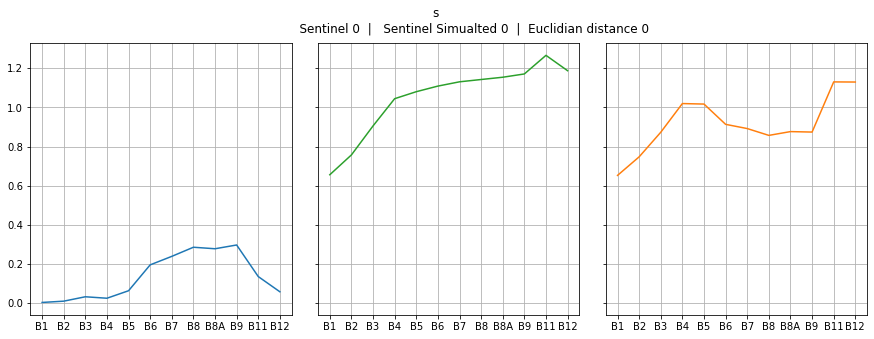

[1.000e-04 1.090e-02 4.130e-02 3.310e-02 9.470e-02 2.397e-01 2.881e-01
 2.968e-01 3.334e-01 3.025e-01 1.763e-01 8.280e-02]
[0.415423 0.475413 0.575259 0.728064 0.77842  0.820285 0.860089 0.894885
 0.92276  0.968286 1.153614 1.067419]
[1.084477 1.013687 0.883441 0.738836 0.62688  0.440015 0.351811 0.308315
 0.24384  0.229214 0.170086 0.349781]


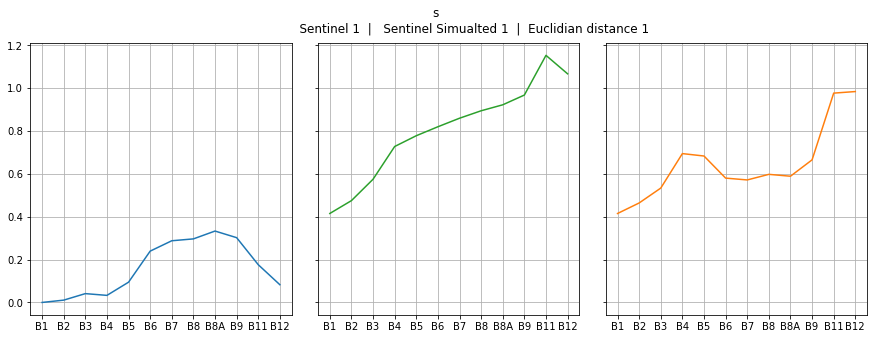

[0.0029 0.0114 0.0404 0.0312 0.0795 0.2079 0.2486 0.2629 0.2728 0.2971
 0.1621 0.0833]
[0.63665  0.714615 0.825851 0.956652 0.996734 1.03003  1.059775 1.079392
 1.097252 1.122707 1.248548 1.199187]
[0.86045  0.773985 0.633749 0.512148 0.423766 0.26207  0.191625 0.157708
 0.129948 0.080193 0.089352 0.217513]


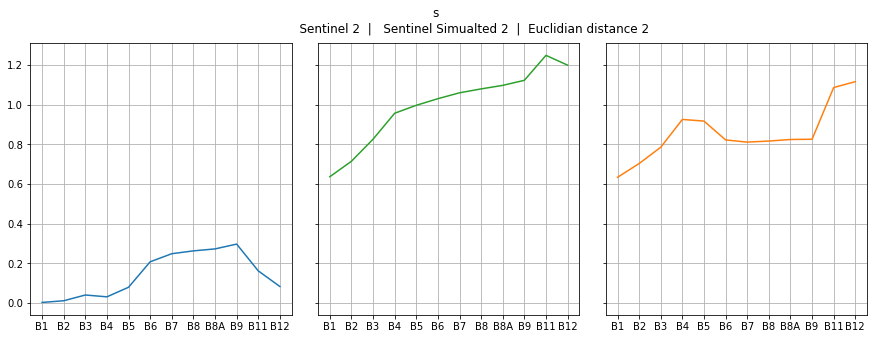

[0.0063 0.0146 0.0531 0.0318 0.0891 0.2742 0.3251 0.3946 0.367  0.2933
 0.1736 0.0795]
[0.452848 0.523181 0.62924  0.765188 0.80603  0.838631 0.866917 0.889071
 0.907661 0.936781 1.066651 1.024661]
[1.040852 0.962219 0.81766  0.703012 0.60487  0.387169 0.307983 0.216329
 0.225339 0.269919 0.259749 0.395839]


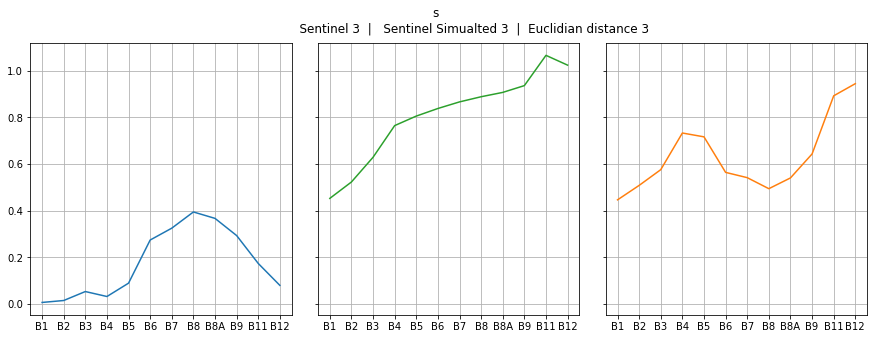

[0.001  0.002  0.0178 0.0157 0.0476 0.158  0.1912 0.1848 0.2066 0.2519
 0.0977 0.048 ]
[0.589857 0.672344 0.800825 0.962991 1.008803 1.04607  1.076715 1.096058
 1.114352 1.138707 1.252476 1.204491]
[0.909143 0.825656 0.681375 0.521309 0.443597 0.29593  0.232085 0.219142
 0.179048 0.109393 0.149824 0.247509]


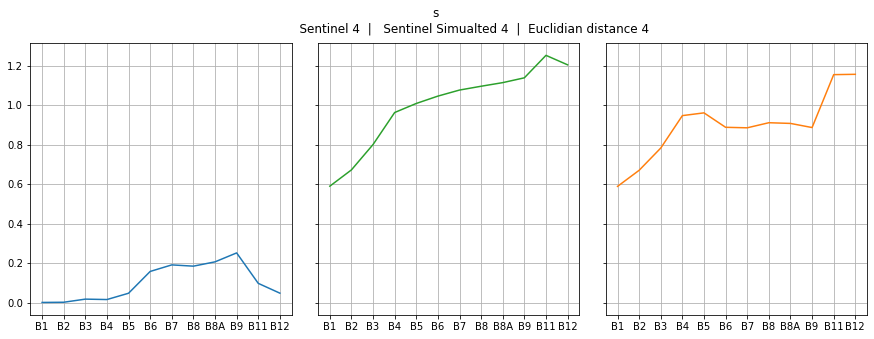

[0.0092 0.0165 0.0431 0.0362 0.077  0.1462 0.1836 0.2464 0.1911 0.2503
 0.1416 0.0829]
[0.70157  0.773319 0.870106 0.978453 1.011508 1.039405 1.063842 1.080888
 1.09624  1.117441 1.203223 1.174467]
[0.78923  0.710181 0.586794 0.485347 0.411492 0.314395 0.252558 0.172712
 0.21266  0.132259 0.155177 0.242633]


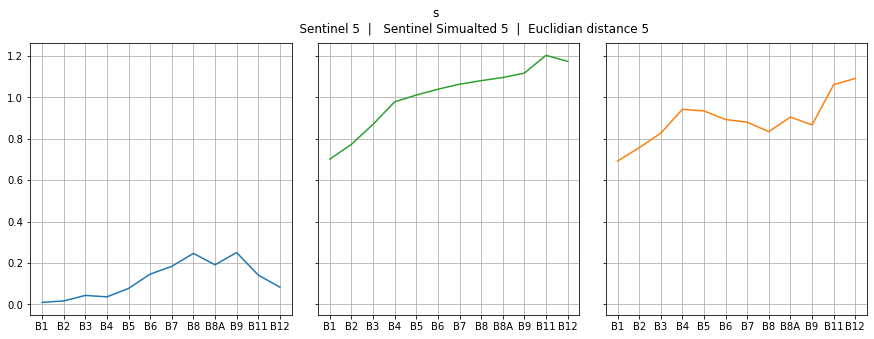

[0.0119 0.0253 0.0623 0.057  0.1161 0.2396 0.2699 0.2849 0.3139 0.3378
 0.2501 0.1344]
[0.599354 0.691313 0.825835 0.956907 0.996136 1.029083 1.053859 1.063893
 1.075556 1.090291 1.199332 1.120937]
[0.888746 0.783387 0.611865 0.486093 0.387764 0.231317 0.176241 0.151207
 0.110544 0.071909 0.050568 0.244663]


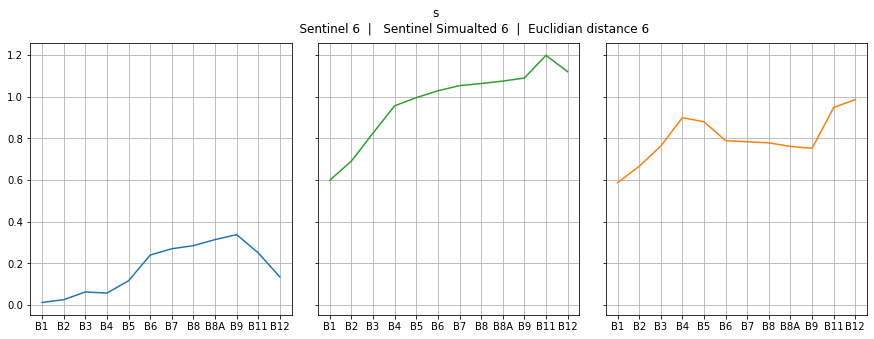

[0.0087 0.0174 0.0499 0.0342 0.0864 0.2314 0.2791 0.3369 0.3077 0.2781
 0.1739 0.0837]
[0.496426 0.573987 0.696253 0.849613 0.898228 0.937933 0.971837 0.994564
 1.015234 1.044689 1.183806 1.100888]
[0.994874 0.908613 0.753847 0.616187 0.515372 0.330667 0.249063 0.168536
 0.177066 0.177211 0.142294 0.315412]


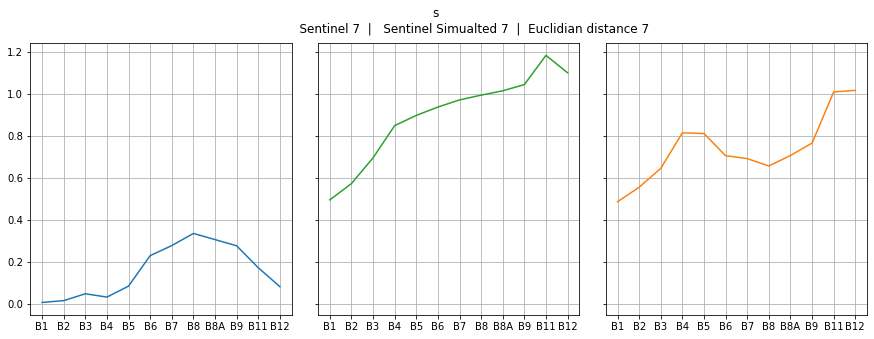

[0.0206 0.0231 0.0532 0.0431 0.1008 0.2307 0.2754 0.294  0.3074 0.3111
 0.2229 0.1157]
[0.518334 0.585076 0.694086 0.848525 0.900657 0.94521  0.985811 1.018245
 1.045675 1.086479 1.238482 1.157976]
[0.961066 0.891824 0.752714 0.608375 0.498543 0.32409  0.238789 0.187755
 0.146925 0.102421 0.038618 0.226324]


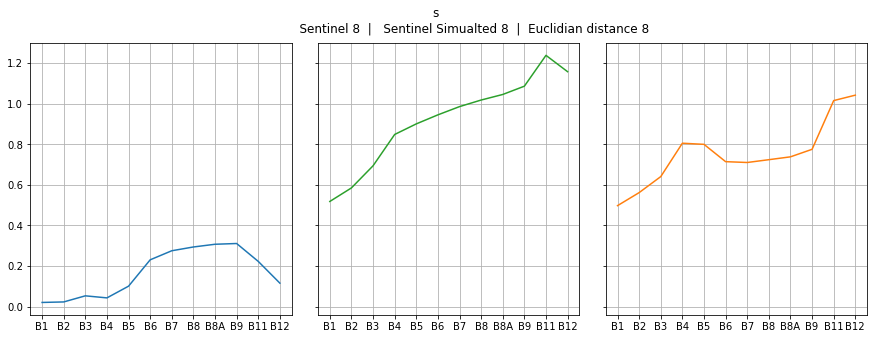

[0.0046 0.0172 0.0344 0.038  0.0952 0.1775 0.2285 0.1987 0.2526 0.2537
 0.1677 0.0916]
[0.571287 0.648203 0.76949  0.916442 0.958159 0.990836 1.016596 1.032428
 1.047059 1.069179 1.179322 1.141503]
[0.924113 0.834597 0.69611  0.545558 0.446641 0.331664 0.254904 0.268872
 0.200341 0.177121 0.152978 0.266897]


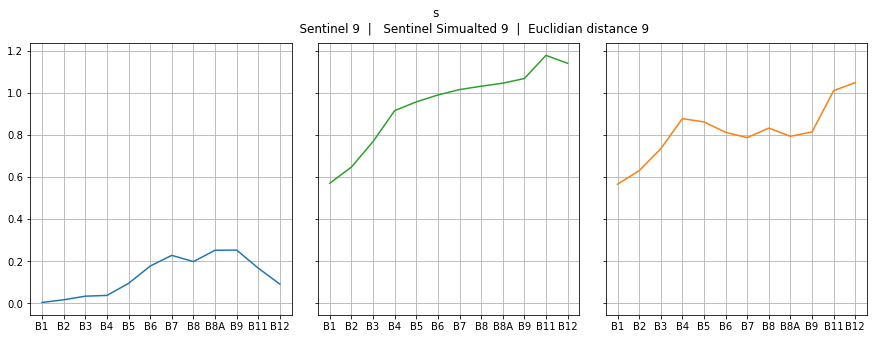

In [149]:
for col in df_merge.index[:10]:

    fig = plt.figure(figsize=(15, 5))
    gs = fig.add_gridspec(1, 3, hspace=.1, wspace=.1)
    (ax1, ax2, ax3) = gs.subplots(sharex='col', sharey='row')
    
    fig.suptitle(f's\n                    Sentinel {col}  |   Sentinel Simualted {col}  |  Euclidian distance {col}')
    
    ax1.plot(
        [i.split('_')[0] for i in df_merge.columns if i.endswith('_sen')],
        df_merge[[i for i in df_merge.columns if i.endswith('_sen')]].loc[col],
        'tab:blue'
    )
    ax2.plot(
        [i.split('_')[0] for i in df_merge.columns if i.endswith('_simsen')],
        1.5-df_merge[[i for i in df_merge.columns if i.endswith('_simsen')]].loc[col],
        'tab:green'
    )
    
    print(df_merge[[i for i in df_merge.columns if i.endswith('_sen')]].loc[col].values)
    print(1.5-df_merge[[i for i in df_merge.columns if i.endswith('_simsen')]].loc[col].values)
    print(abs(df_merge[[i for i in df_merge.columns if i.endswith('_sen')]].loc[col].values - df_merge[[i for i in df_merge.columns if i.endswith('_simsen')]].loc[col].values))
    
    ax3.plot(
        [i.split('_')[0] for i in df_merge.columns if i.endswith('_simsen')],
        abs(df_merge[[i for i in df_merge.columns if i.endswith('_sen')]].loc[col].values - 1.5 + df_merge[[i for i in df_merge.columns if i.endswith('_simsen')]].loc[col].values),
        'tab:orange'
    )
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    
    plt.show()

## Soil data

In [150]:
df_soil_data = pd.merge(df_merge.round(6), df_temp[df_temp['quality_classification'] == 'NOT_VEGETATION'][['pH', 'OM', 'Ca', 'Mg', 'K', 'Na']].round(6), on=['pH', 'OM', 'Ca', 'Mg', 'K', 'Na'])
print(df_soil_data.shape)
df_soil_data.head()

(19, 42)


,pH,OM,Ca,Mg,K,Na,B1_443.9_sen,B2_496.6_sen,B3_560.0_sen,B4_664.5_sen,B5_703.9_sen,B6_740.2_sen,B7_782.5_sen,B8_835.1_sen,B8A_864.8_sen,B9_945.0_sen,B11_1613.7_sen,B12_2202.4_sen,B1_443.9_simsen,B2_496.6_simsen,B3_560.0_simsen,B4_664.5_simsen,B5_703.9_simsen,B6_740.2_simsen,B7_782.5_simsen,B8_835.1_simsen,B8A_864.8_simsen,B9_945.0_simsen,B11_1613.7_simsen,B12_2202.4_simsen,B1_443.9_diff,B2_496.6_diff,B3_560.0_diff,B4_664.5_diff,B5_703.9_diff,B6_740.2_diff,B7_782.5_diff,B8_835.1_diff,B8A_864.8_diff,B9_945.0_diff,B11_1613.7_diff,B12_2202.4_diff
0,6.65,9.539340,34.552011,1.283865,0.319940,0.088900,0.0421,0.0759,0.1091,0.1443,0.1631,0.2350,0.2630,0.3007,0.3067,0.3244,0.3671,0.2359,1.163175,1.113722,1.028290,0.901123,0.855805,0.811272,0.764644,0.718753,0.684615,0.621008,0.335114,0.408983,1.121075,1.037822,0.919190,0.756823,0.692705,0.576272,0.501644,0.418053,0.377915,0.296608,0.031986,0.173083
1,4.84,3.277188,5.268932,0.860074,0.236551,0.218843,0.0518,0.0760,0.1086,0.1504,0.1753,0.2088,0.2338,0.2549,0.2729,0.2665,0.4036,0.2650,0.865080,0.777134,0.649812,0.511364,0.458729,0.421095,0.393666,0.380004,0.365866,0.346714,0.229702,0.308242,0.813280,0.701134,0.541212,0.360964,0.283429,0.212295,0.159866,0.125104,0.092966,0.080214,0.173898,0.043242
2,6.81,4.491411,22.106216,1.298166,0.276951,0.329939,0.0551,0.0948,0.1405,0.1678,0.1578,0.2233,0.2305,0.2727,0.2578,0.3075,0.3157,0.2272,1.032048,0.971747,0.877226,0.748679,0.697554,0.652139,0.609447,0.574162,0.544972,0.499835,0.311357,0.399764,0.976948,0.876947,0.736726,0.580879,0.539754,0.428839,0.378947,0.301462,0.287172,0.192335,0.004343,0.172564
3,6.56,3.996831,17.073114,1.058844,0.119232,0.161812,0.0348,0.0751,0.1103,0.1457,0.1577,0.2125,0.2377,0.2573,0.2699,0.3001,0.3159,0.2170,1.024832,0.948967,0.842143,0.744356,0.715365,0.688938,0.664904,0.648659,0.635003,0.610154,0.444810,0.463378,0.990032,0.873867,0.731843,0.598656,0.557665,0.476438,0.427204,0.391359,0.365103,0.310054,0.128910,0.246378
4,4.42,6.835504,1.179035,0.132695,0.169423,0.108512,0.0295,0.0511,0.0787,0.1130,0.1442,0.1729,0.1959,0.2219,0.2275,0.2409,0.3278,0.2137,1.116867,1.060257,0.958977,0.806724,0.752582,0.703821,0.657472,0.620803,0.589637,0.543690,0.369004,0.490923,1.087367,1.009157,0.880277,0.693724,0.608382,0.530921,0.461572,0.398903,0.362137,0.302790,0.041204,0.277223


[0.0421 0.0759 0.1091 0.1443 0.1631 0.235  0.263  0.3007 0.3067 0.3244
 0.3671 0.2359]
[0.336825 0.386278 0.47171  0.598877 0.644195 0.688728 0.735356 0.781247
 0.815385 0.878992 1.164886 1.091017]
[1.121075 1.037822 0.91919  0.756823 0.692705 0.576272 0.501644 0.418053
 0.377915 0.296608 0.031986 0.173083]


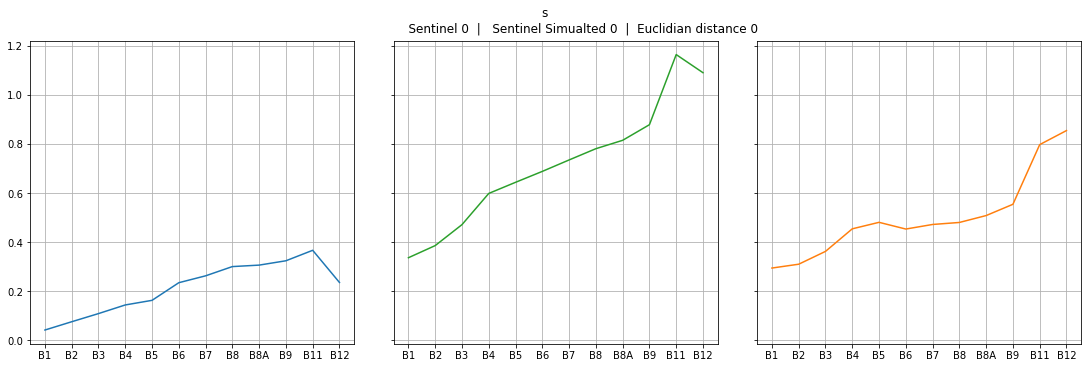

[0.0518 0.076  0.1086 0.1504 0.1753 0.2088 0.2338 0.2549 0.2729 0.2665
 0.4036 0.265 ]
[0.63492  0.722866 0.850188 0.988636 1.041271 1.078905 1.106334 1.119996
 1.134134 1.153286 1.270298 1.191758]
[0.81328  0.701134 0.541212 0.360964 0.283429 0.212295 0.159866 0.125104
 0.092966 0.080214 0.173898 0.043242]


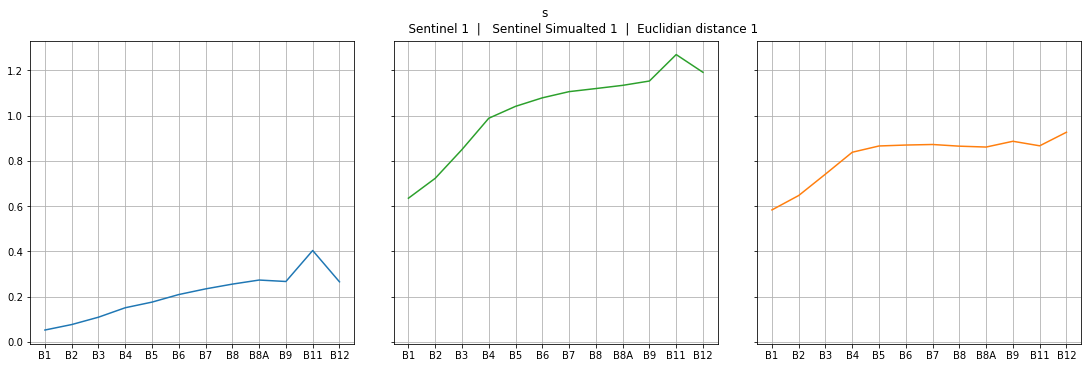

[0.0551 0.0948 0.1405 0.1678 0.1578 0.2233 0.2305 0.2727 0.2578 0.3075
 0.3157 0.2272]
[0.467952 0.528253 0.622774 0.751321 0.802446 0.847861 0.890553 0.925838
 0.955028 1.000165 1.188643 1.100236]
[0.976948 0.876947 0.736726 0.580879 0.539754 0.428839 0.378947 0.301462
 0.287172 0.192335 0.004343 0.172564]


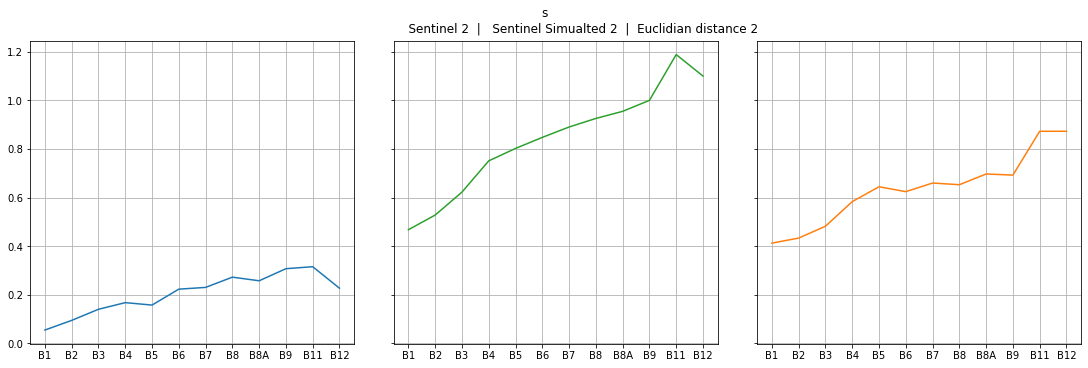

[0.0348 0.0751 0.1103 0.1457 0.1577 0.2125 0.2377 0.2573 0.2699 0.3001
 0.3159 0.217 ]
[0.475168 0.551033 0.657857 0.755644 0.784635 0.811062 0.835096 0.851341
 0.864997 0.889846 1.05519  1.036622]
[0.990032 0.873867 0.731843 0.598656 0.557665 0.476438 0.427204 0.391359
 0.365103 0.310054 0.12891  0.246378]


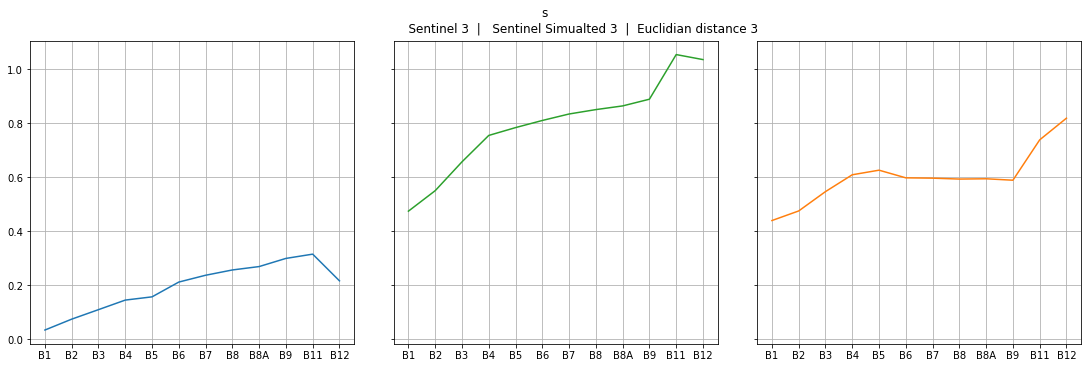

[0.0295 0.0511 0.0787 0.113  0.1442 0.1729 0.1959 0.2219 0.2275 0.2409
 0.3278 0.2137]
[0.383133 0.439743 0.541023 0.693276 0.747418 0.796179 0.842528 0.879197
 0.910363 0.95631  1.130996 1.009077]
[1.087367 1.009157 0.880277 0.693724 0.608382 0.530921 0.461572 0.398903
 0.362137 0.30279  0.041204 0.277223]


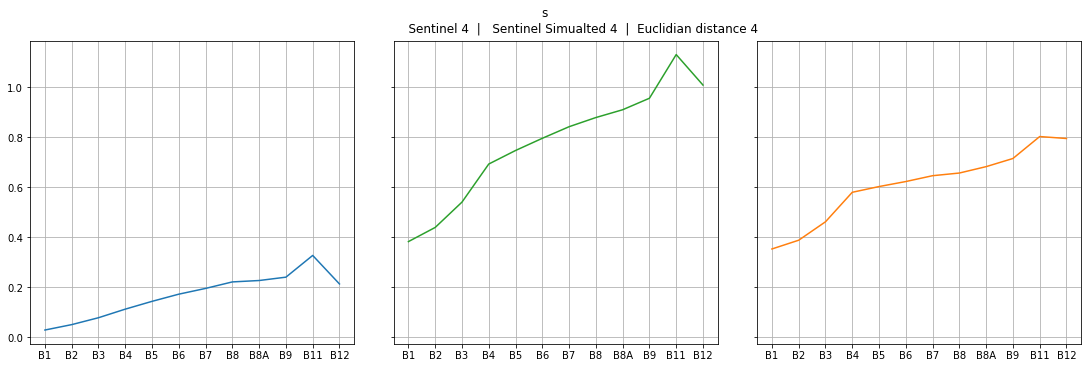

[0.0404 0.0559 0.0908 0.1086 0.1619 0.228  0.2545 0.2748 0.2901 0.2922
 0.3913 0.2653]
[0.394607 0.447133 0.53174  0.64924  0.687361 0.724108 0.762364 0.798271
 0.826198 0.872983 1.069726 1.055813]
[1.064993 0.996967 0.87746  0.74216  0.650739 0.547892 0.483136 0.426929
 0.383702 0.334817 0.038974 0.178887]


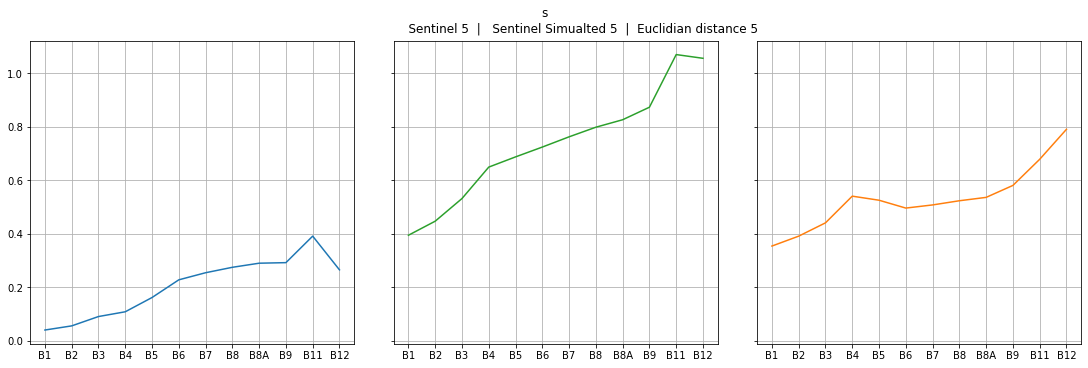

[0.1675 0.1452 0.1878 0.1917 0.2557 0.3655 0.4035 0.403  0.43   0.4595
 0.3571 0.2387]
[0.4074   0.485627 0.612126 0.758678 0.802764 0.840929 0.875337 0.903581
 0.926123 0.966308 1.17378  1.090129]
[0.9251   0.869173 0.700074 0.549622 0.441536 0.293571 0.221163 0.193419
 0.143877 0.074192 0.03088  0.171171]


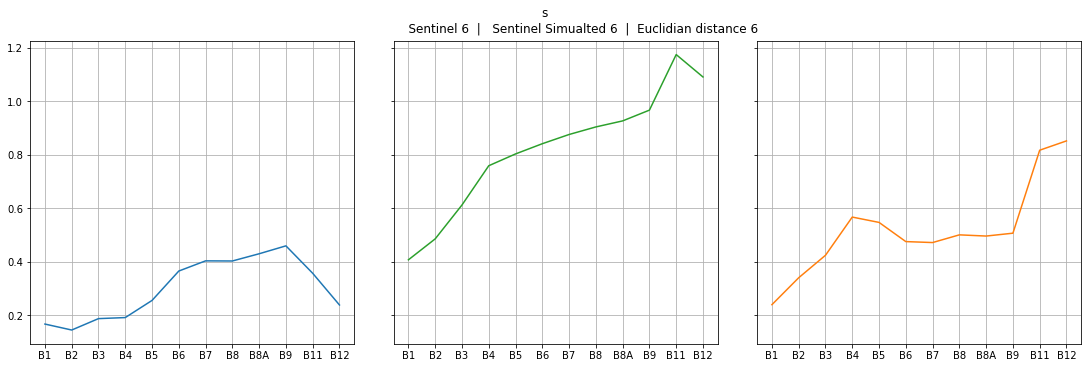

[0.0845 0.1099 0.1474 0.1453 0.1644 0.2214 0.2397 0.2352 0.2627 0.2801
 0.2311 0.1796]
[0.360317 0.391938 0.461216 0.61267  0.670799 0.727175 0.785509 0.840369
 0.884004 0.951216 1.131906 1.093039]
[1.055183 0.998162 0.891384 0.74203  0.664801 0.551425 0.474791 0.424431
 0.353296 0.268684 0.136994 0.227361]


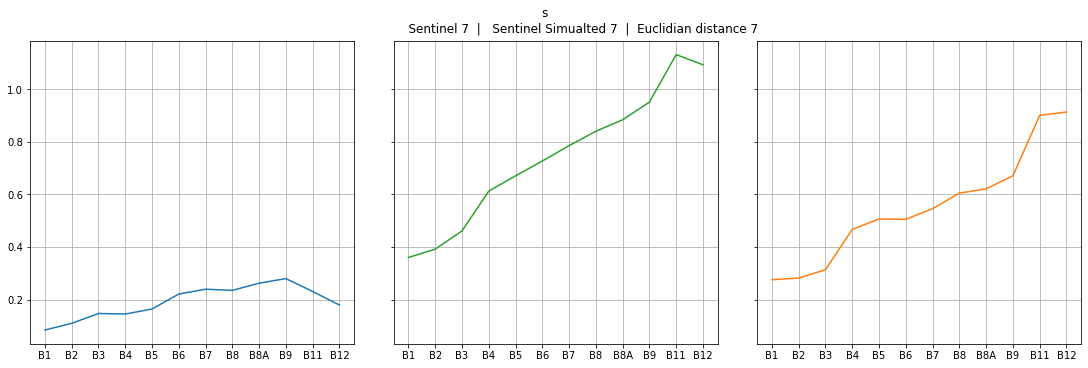

[0.0557 0.073  0.108  0.1457 0.1842 0.2204 0.2526 0.2679 0.2942 0.2989
 0.4201 0.2819]
[0.562091 0.635456 0.755679 0.918701 0.968645 1.01115  1.047764 1.071448
 1.093723 1.12277  1.249916 1.158854]
[0.882209 0.791544 0.636321 0.435599 0.347155 0.26845  0.199636 0.160652
 0.112077 0.07833  0.170016 0.059246]


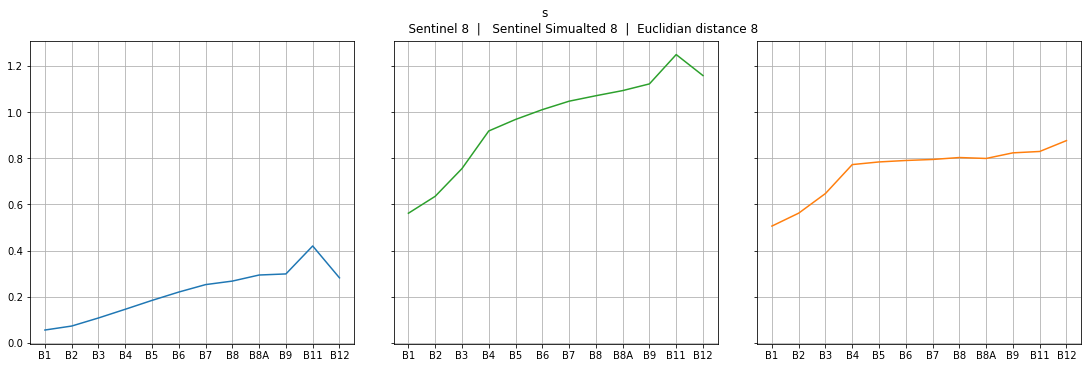

[0.0424 0.0493 0.0801 0.1095 0.1629 0.2225 0.2547 0.2716 0.2949 0.3093
 0.3187 0.1979]
[0.414243 0.476747 0.584358 0.735281 0.787853 0.832692 0.872355 0.900441
 0.925373 0.96136  1.121758 0.973919]
[1.043357 0.973953 0.835542 0.655219 0.549247 0.444808 0.372945 0.327959
 0.279727 0.22934  0.059542 0.328181]


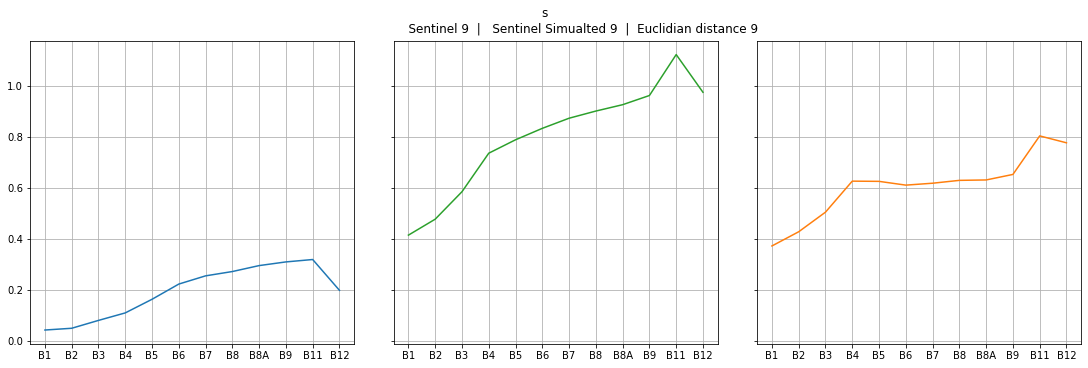

In [151]:

for col in df_soil_data.index[:10]:
    
    fig = plt.figure(figsize=(15, 5), constrained_layout=True)
    gs = fig.add_gridspec(1, 3, hspace=.2, wspace=.1)
    
    (ax1, ax2, ax3) = gs.subplots(sharex='col', sharey='row')
    
    fig.suptitle(f's\n                    Sentinel {col}  |   Sentinel Simualted {col}  |  Euclidian distance {col}')
    
    ax1.plot(
        [i.split('_')[0] for i in df_soil_data.columns if i.endswith('_sen')],
        df_soil_data[[i for i in df_soil_data.columns if i.endswith('_sen')]].loc[col],
        'tab:blue'
    )
    ax2.plot(
        [i.split('_')[0] for i in df_soil_data.columns if i.endswith('_simsen')],
        1.5-df_soil_data[[i for i in df_soil_data.columns if i.endswith('_simsen')]].loc[col],
        'tab:green'
    )
    
    print(df_soil_data[[i for i in df_soil_data.columns if i.endswith('_sen')]].loc[col].values)
    print(1.5-df_soil_data[[i for i in df_soil_data.columns if i.endswith('_simsen')]].loc[col].values)
    print(abs(df_soil_data[[i for i in df_soil_data.columns if i.endswith('_sen')]].loc[col].values - df_soil_data[[i for i in df_soil_data.columns if i.endswith('_simsen')]].loc[col].values))
    
    ax3.plot(
        [i.split('_')[0] for i in df_soil_data.columns if i.endswith('_simsen')],
        abs(df_soil_data[[i for i in df_soil_data.columns if i.endswith('_sen')]].loc[col].values - 1.5 + df_soil_data[[i for i in df_soil_data.columns if i.endswith('_simsen')]].loc[col].values),
        'tab:orange'
    )
    
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    
    plt.show()

In [152]:
df_soil_data.columns

Index(['pH', 'OM', 'Ca', 'Mg', 'K', 'Na', 'B1_443.9_sen', 'B2_496.6_sen',
       'B3_560.0_sen', 'B4_664.5_sen', 'B5_703.9_sen', 'B6_740.2_sen',
       'B7_782.5_sen', 'B8_835.1_sen', 'B8A_864.8_sen', 'B9_945.0_sen',
       'B11_1613.7_sen', 'B12_2202.4_sen', 'B1_443.9_simsen',
       'B2_496.6_simsen', 'B3_560.0_simsen', 'B4_664.5_simsen',
       'B5_703.9_simsen', 'B6_740.2_simsen', 'B7_782.5_simsen',
       'B8_835.1_simsen', 'B8A_864.8_simsen', 'B9_945.0_simsen',
       'B11_1613.7_simsen', 'B12_2202.4_simsen', 'B1_443.9_diff',
       'B2_496.6_diff', 'B3_560.0_diff', 'B4_664.5_diff', 'B5_703.9_diff',
       'B6_740.2_diff', 'B7_782.5_diff', 'B8_835.1_diff', 'B8A_864.8_diff',
       'B9_945.0_diff', 'B11_1613.7_diff', 'B12_2202.4_diff'],
      dtype='object')

## Normalized data

In [153]:
needed_cols = [
    'B1_443.9_sen', 'B2_496.6_sen',
   'B3_560.0_sen', 'B4_664.5_sen', 'B5_703.9_sen', 'B6_740.2_sen',
   'B7_782.5_sen', 'B8_835.1_sen', 'B8A_864.8_sen', 'B9_945.0_sen',
   'B11_1613.7_sen', 'B12_2202.4_sen', 'B1_443.9_simsen',
   'B2_496.6_simsen', 'B3_560.0_simsen', 'B4_664.5_simsen',
   'B5_703.9_simsen', 'B6_740.2_simsen', 'B7_782.5_simsen',
   'B8_835.1_simsen', 'B8A_864.8_simsen', 'B9_945.0_simsen',
   'B11_1613.7_simsen', 'B12_2202.4_simsen'
]

In [154]:
df_soil_data

,pH,OM,Ca,Mg,K,Na,B1_443.9_sen,B2_496.6_sen,B3_560.0_sen,B4_664.5_sen,B5_703.9_sen,B6_740.2_sen,B7_782.5_sen,B8_835.1_sen,B8A_864.8_sen,B9_945.0_sen,B11_1613.7_sen,B12_2202.4_sen,B1_443.9_simsen,B2_496.6_simsen,B3_560.0_simsen,B4_664.5_simsen,B5_703.9_simsen,B6_740.2_simsen,B7_782.5_simsen,B8_835.1_simsen,B8A_864.8_simsen,B9_945.0_simsen,B11_1613.7_simsen,B12_2202.4_simsen,B1_443.9_diff,B2_496.6_diff,B3_560.0_diff,B4_664.5_diff,B5_703.9_diff,B6_740.2_diff,B7_782.5_diff,B8_835.1_diff,B8A_864.8_diff,B9_945.0_diff,B11_1613.7_diff,B12_2202.4_diff
0,6.65,9.539340,34.552011,1.283865,0.319940,0.088900,0.0421,0.0759,0.1091,0.1443,0.1631,0.2350,0.2630,0.3007,0.3067,0.3244,0.3671,0.2359,1.163175,1.113722,1.028290,0.901123,0.855805,0.811272,0.764644,0.718753,0.684615,0.621008,0.335114,0.408983,1.121075,1.037822,0.919190,0.756823,0.692705,0.576272,0.501644,0.418053,0.377915,0.296608,0.031986,0.173083
1,4.84,3.277188,5.268932,0.860074,0.236551,0.218843,0.0518,0.0760,0.1086,0.1504,0.1753,0.2088,0.2338,0.2549,0.2729,0.2665,0.4036,0.2650,0.865080,0.777134,0.649812,0.511364,0.458729,0.421095,0.393666,0.380004,0.365866,0.346714,0.229702,0.308242,0.813280,0.701134,0.541212,0.360964,0.283429,0.212295,0.159866,0.125104,0.092966,0.080214,0.173898,0.043242
2,6.81,4.491411,22.106216,1.298166,0.276951,0.329939,0.0551,0.0948,0.1405,0.1678,0.1578,0.2233,0.2305,0.2727,0.2578,0.3075,0.3157,0.2272,1.032048,0.971747,0.877226,0.748679,0.697554,0.652139,0.609447,0.574162,0.544972,0.499835,0.311357,0.399764,0.976948,0.876947,0.736726,0.580879,0.539754,0.428839,0.378947,0.301462,0.287172,0.192335,0.004343,0.172564
3,6.56,3.996831,17.073114,1.058844,0.119232,0.161812,0.0348,0.0751,0.1103,0.1457,0.1577,0.2125,0.2377,0.2573,0.2699,0.3001,0.3159,0.2170,1.024832,0.948967,0.842143,0.744356,0.715365,0.688938,0.664904,0.648659,0.635003,0.610154,0.444810,0.463378,0.990032,0.873867,0.731843,0.598656,0.557665,0.476438,0.427204,0.391359,0.365103,0.310054,0.128910,0.246378
4,4.42,6.835504,1.179035,0.132695,0.169423,0.108512,0.0295,0.0511,0.0787,0.1130,0.1442,0.1729,0.1959,0.2219,0.2275,0.2409,0.3278,0.2137,1.116867,1.060257,0.958977,0.806724,0.752582,0.703821,0.657472,0.620803,0.589637,0.543690,0.369004,0.490923,1.087367,1.009157,0.880277,0.693724,0.608382,0.530921,0.461572,0.398903,0.362137,0.302790,0.041204,0.277223
5,6.01,8.122747,21.061016,0.877271,0.395283,0.518735,0.0404,0.0559,0.0908,0.1086,0.1619,0.2280,0.2545,0.2748,0.2901,0.2922,0.3913,0.2653,1.105393,1.052867,0.968260,0.850760,0.812639,0.775892,0.737636,0.701729,0.673802,0.627017,0.430274,0.444187,1.064993,0.996967,0.877460,0.742160,0.650739,0.547892,0.483136,0.426929,0.383702,0.334817,0.038974,0.178887
6,5.07,6.591004,1.015667,0.683207,0.717473,0.482947,0.1675,0.1452,0.1878,0.1917,0.2557,0.3655,0.4035,0.4030,0.4300,0.4595,0.3571,0.2387,1.092600,1.014373,0.887874,0.741322,0.697236,0.659071,0.624663,0.596419,0.573877,0.533692,0.326220,0.409871,0.925100,0.869173,0.700074,0.549622,0.441536,0.293571,0.221163,0.193419,0.143877,0.074192,0.030880,0.171171
7,6.83,10.804155,11.566047,2.540575,0.719893,0.440652,0.0845,0.1099,0.1474,0.1453,0.1644,0.2214,0.2397,0.2352,0.2627,0.2801,0.2311,0.1796,1.139683,1.108062,1.038784,0.887330,0.829201,0.772825,0.714491,0.659631,0.615996,0.548784,0.368094,0.406961,1.055183,0.998162,0.891384,0.742030,0.664801,0.551425,0.474791,0.424431,0.353296,0.268684,0.136994,0.227361
8,4.55,7.414472,1.834701,0.477195,0.212412,0.604856,0.0557,0.0730,0.1080,0.1457,0.1842,0.2204,0.2526,0.2679,0.2942,0.2989,0.4201,0.2819,0.937909,0.864544,0.744321,0.581299,0.531355,0.488850,0.452236,0.428552,0.406277,0.377230,0.250084,0.341146,0.882209,0.791544,0.636321,0.435599,0.347155,0.268450,0.199636,0.160652,0.112077,0.078330,0.170016,0.059246
9,4.59,5.388757,1.682642,0.685199,0.219220,0.216546,0.0424,0.0493,0.0801,0.1095,0.1629,0.2225,0.2547,0.2716,0.2949,0.3093,0.3187,0.1979,1.085757,1.023253,0.915642,0.764719,0.712147,0.667308,0.627645,0.599559,0.574627,0.538640,0.378242,0.526081,1.043357,0.973953,0.835542,0.6552

In [155]:
df_soil_data_ = df_soil_data[needed_cols].copy()

In [156]:
print(df_soil_data_.shape)
df_soil_data_.head()

(19, 24)


,B1_443.9_sen,B2_496.6_sen,B3_560.0_sen,B4_664.5_sen,B5_703.9_sen,B6_740.2_sen,B7_782.5_sen,B8_835.1_sen,B8A_864.8_sen,B9_945.0_sen,B11_1613.7_sen,B12_2202.4_sen,B1_443.9_simsen,B2_496.6_simsen,B3_560.0_simsen,B4_664.5_simsen,B5_703.9_simsen,B6_740.2_simsen,B7_782.5_simsen,B8_835.1_simsen,B8A_864.8_simsen,B9_945.0_simsen,B11_1613.7_simsen,B12_2202.4_simsen
0,0.0421,0.0759,0.1091,0.1443,0.1631,0.2350,0.2630,0.3007,0.3067,0.3244,0.3671,0.2359,1.163175,1.113722,1.028290,0.901123,0.855805,0.811272,0.764644,0.718753,0.684615,0.621008,0.335114,0.408983
1,0.0518,0.0760,0.1086,0.1504,0.1753,0.2088,0.2338,0.2549,0.2729,0.2665,0.4036,0.2650,0.865080,0.777134,0.649812,0.511364,0.458729,0.421095,0.393666,0.380004,0.365866,0.346714,0.229702,0.308242
2,0.0551,0.0948,0.1405,0.1678,0.1578,0.2233,0.2305,0.2727,0.2578,0.3075,0.3157,0.2272,1.032048,0.971747,0.877226,0.748679,0.697554,0.652139,0.609447,0.574162,0.544972,0.499835,0.311357,0.399764
3,0.0348,0.0751,0.1103,0.1457,0.1577,0.2125,0.2377,0.2573,0.2699,0.3001,0.3159,0.2170,1.024832,0.948967,0.842143,0.744356,0.715365,0.688938,0.664904,0.648659,0.635003,0.610154,0.444810,0.463378
4,0.0295,0.0511,0.0787,0.1130,0.1442,0.1729,0.1959,0.2219,0.2275,0.2409,0.3278,0.2137,1.116867,1.060257,0.958977,0.806724,0.752582,0.703821,0.657472,0.620803,0.589637,0.543690,0.369004,0.490923


In [157]:
from sklearn.preprocessing import RobustScaler

def normalized_data(x):
    return (x - x.min())/(x.max() - x.min())

In [158]:
df_soil_data_.columns

Index(['B1_443.9_sen', 'B2_496.6_sen', 'B3_560.0_sen', 'B4_664.5_sen',
       'B5_703.9_sen', 'B6_740.2_sen', 'B7_782.5_sen', 'B8_835.1_sen',
       'B8A_864.8_sen', 'B9_945.0_sen', 'B11_1613.7_sen', 'B12_2202.4_sen',
       'B1_443.9_simsen', 'B2_496.6_simsen', 'B3_560.0_simsen',
       'B4_664.5_simsen', 'B5_703.9_simsen', 'B6_740.2_simsen',
       'B7_782.5_simsen', 'B8_835.1_simsen', 'B8A_864.8_simsen',
       'B9_945.0_simsen', 'B11_1613.7_simsen', 'B12_2202.4_simsen'],
      dtype='object')

In [159]:
# sns.displot(normalized_data(df_soil_data_[df_soil_data_.columns[:12]].loc[0]), kde=True)
# sns.displot(normalized_data(1.5-df_soil_data_[df_soil_data_.columns[12:]].loc[0]), kde=True)

In [160]:
# scaler = RobustScaler()
# scaler.fit(df_soil_data_[df_soil_data_.columns[:12]].loc[0].values.reshape(-1, 1))
# # print(scaler.transform(df_soil_data_[df_soil_data_.columns[:12]].loc[0].values.reshape(-1, 1)).shape)
# cols = [
#     'B1_442.3_sen', 'B2_492.1_sen', 'B3_559.0_sen', 'B4_665.0_sen',
#     'B5_703.8_sen', 'B6_739.1_sen', 'B7_779.7_sen', 'B8_833.0_sen',
#     'B8A_864.0_sen', 'B9_943.2_sen', 'B11_1610.4_sen', 'B12_2202.4_sen'
# ]
# normalized_data_ = scaler.transform(df_soil_data_[df_soil_data_.columns[:12]].loc[0].values.reshape(-1, 1))
# normalized_data_.reshape(1, -1)[0]
# # plt.plot(
# #     cols,
# #     normalized_data_
# # )

In [161]:
# normalized_data(1.5-df_soil_data_[df_soil_data_.columns[12:]].loc[0]).plot()

In [162]:
# normalized_data(df_soil_data_[df_soil_data_.columns[:12]].loc[0]).plot()

In [163]:
# df_soil_data_[df_soil_data_.columns[12:]].loc[0]

In [164]:
for col in df_soil_data_.index:
     
    ls1 = normalized_data(df_soil_data_[df_soil_data_.columns[:12]].loc[col])
    ls2 = normalized_data(1.5-df_soil_data_[df_soil_data_.columns[12:]].loc[col])
#     print(ls1)
#     print(ls2)
    for col2 in df_soil_data_.columns[:12]:
        df_soil_data_.loc[col, col2] = ls1[col2]
        
    for col2 in df_soil_data_.columns[12:]:
        df_soil_data_.loc[col, col2] = ls2[col2]

In [165]:
df_soil_data_

,B1_443.9_sen,B2_496.6_sen,B3_560.0_sen,B4_664.5_sen,B5_703.9_sen,B6_740.2_sen,B7_782.5_sen,B8_835.1_sen,B8A_864.8_sen,B9_945.0_sen,B11_1613.7_sen,B12_2202.4_sen,B1_443.9_simsen,B2_496.6_simsen,B3_560.0_simsen,B4_664.5_simsen,B5_703.9_simsen,B6_740.2_simsen,B7_782.5_simsen,B8_835.1_simsen,B8A_864.8_simsen,B9_945.0_simsen,B11_1613.7_simsen,B12_2202.4_simsen
0,0.000000,0.104000,0.206154,0.314462,0.372308,0.593538,0.679692,0.795692,0.814154,0.868615,1.000000,0.596308,0.0,0.059721,0.162893,0.316465,0.371192,0.424972,0.481282,0.536702,0.577928,0.654743,1.0,0.910793
1,0.000000,0.068789,0.161455,0.280273,0.351052,0.446276,0.517339,0.577317,0.628482,0.610290,1.000000,0.606026,0.0,0.138415,0.338803,0.556702,0.639542,0.698773,0.741943,0.763445,0.785696,0.815839,1.0,0.876389
2,0.000000,0.152341,0.327705,0.432464,0.394091,0.645434,0.673062,0.834996,0.777820,0.968534,1.000000,0.660399,0.0,0.083671,0.214824,0.393191,0.464130,0.527145,0.586383,0.635343,0.675846,0.738476,1.0,0.877330
3,0.000000,0.143365,0.268588,0.394522,0.437211,0.632159,0.721807,0.791533,0.836357,0.943792,1.000000,0.648168,0.0,0.130797,0.314969,0.483561,0.533544,0.579106,0.620542,0.648550,0.672093,0.714935,1.0,0.967987
4,0.000000,0.072410,0.164935,0.279920,0.384512,0.480724,0.557828,0.644988,0.663761,0.708683,1.000000,0.617499,0.0,0.075696,0.211122,0.414706,0.487101,0.552302,0.614277,0.663309,0.704982,0.766420,1.0,0.836977
5,0.000000,0.044172,0.143631,0.194357,0.346252,0.534625,0.610145,0.667997,0.711599,0.717583,1.000000,0.640923,0.0,0.077803,0.203124,0.377168,0.433633,0.488064,0.544729,0.597915,0.639281,0.708580,1.0,0.979392
6,0.070951,0.000000,0.135539,0.147948,0.351575,0.700923,0.821826,0.820235,0.906141,1.000000,0.674197,0.297486,0.0,0.102073,0.267134,0.458360,0.515885,0.565684,0.610581,0.647435,0.676848,0.729283,1.0,0.890849
7,0.000000,0.129857,0.321575,0.310838,0.408487,0.699898,0.793456,0.770450,0.911043,1.000000,0.749489,0.486196,0.0,0.040982,0.130768,0.327056,0.402393,0.475458,0.551060,0.622160,0.678712,0.765821,1.0,0.949627
8,0.000000,0.047475,0.143524,0.246981,0.352634,0.451976,0.540340,0.582327,0.654501,0.667398,1.000000,0.620746,0.0,0.106662,0.281449,0.518460,0.591072,0.652868,0.706100,0.740533,0.772918,0.815148,1.0,0.867609
9,0.000000,0.024973,0.136446,0.242852,0.436120,0.651828,0.768368,0.829533,0.913862,0.965979,1.000000,0.562794,0.0,0.088343,0.240440,0.453754,0.528059,0.591435,0.647494,0.687191,0.722430,0.773294,1.0,0.791045


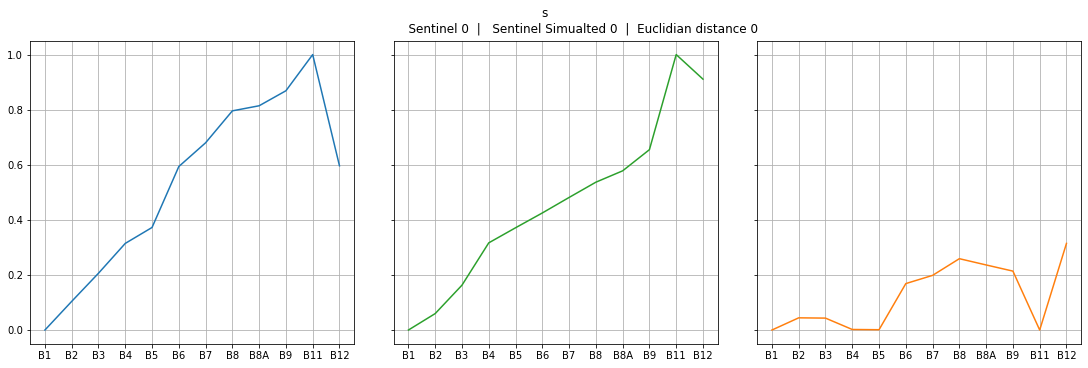

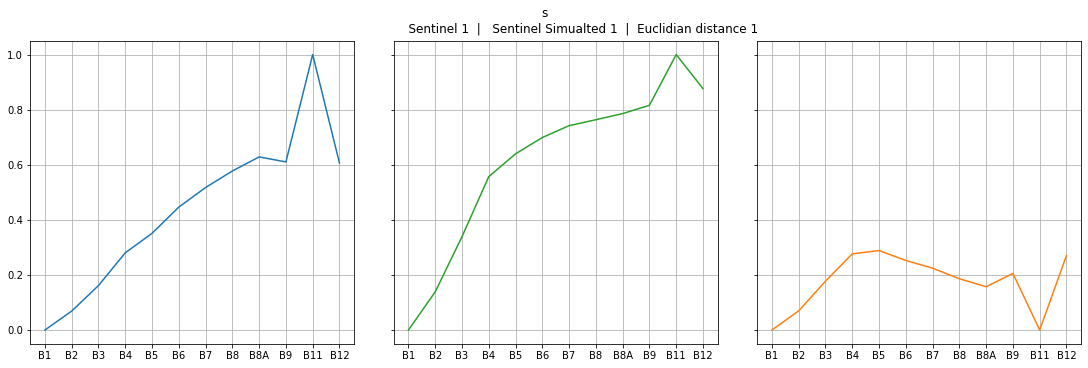

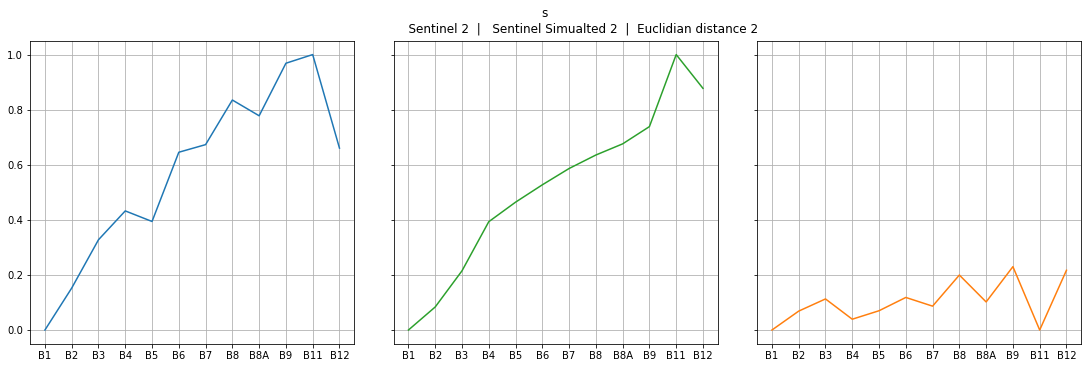

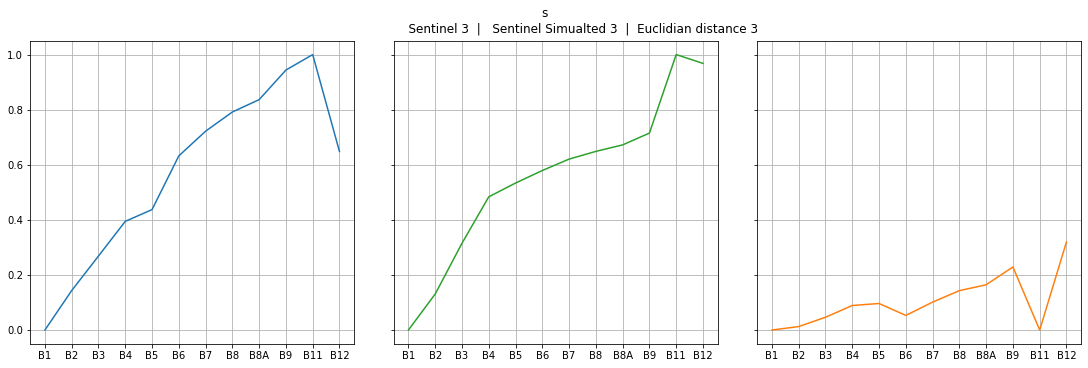

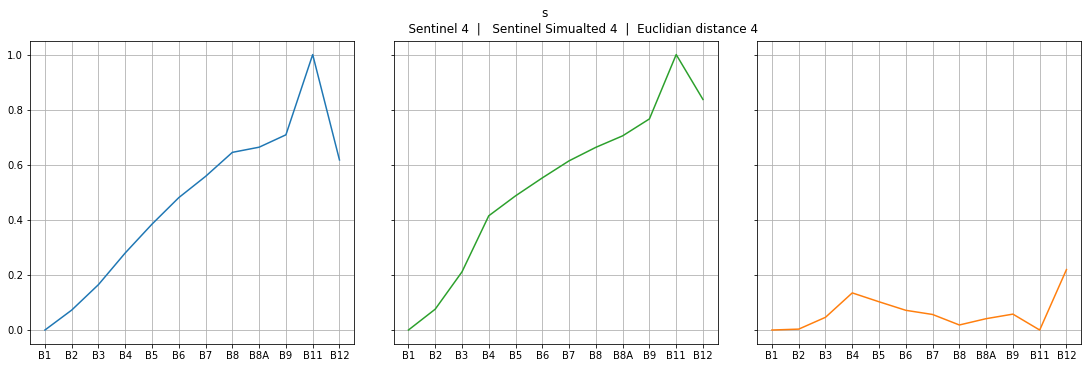

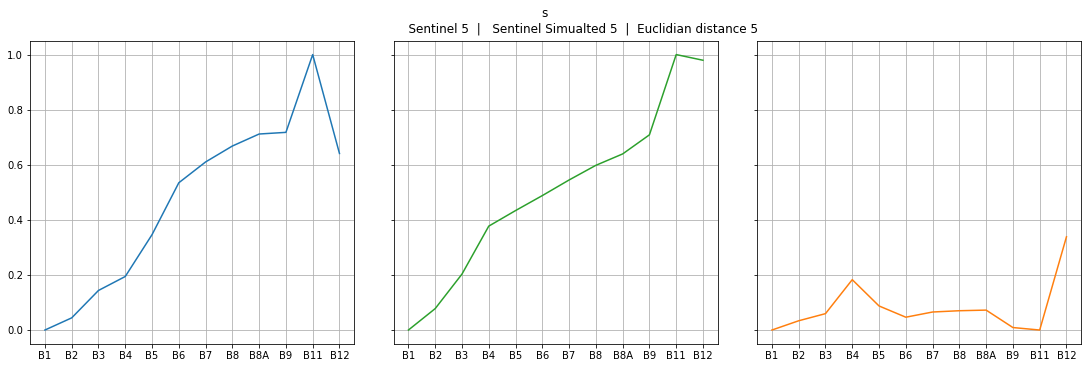

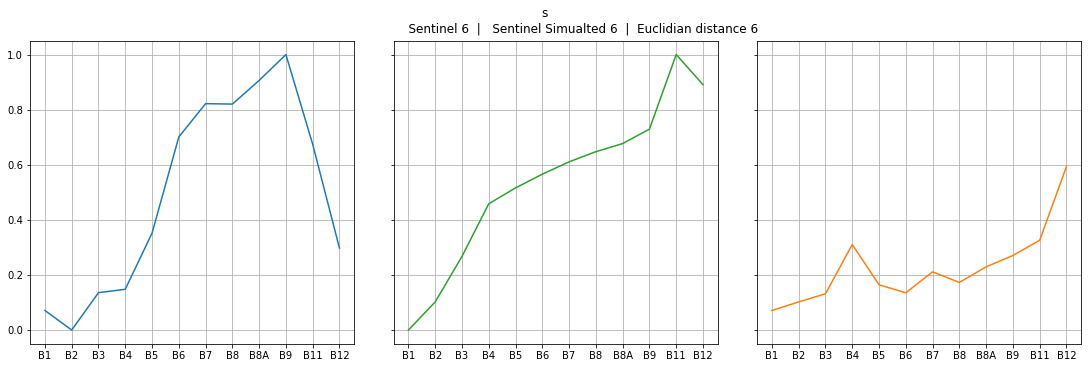

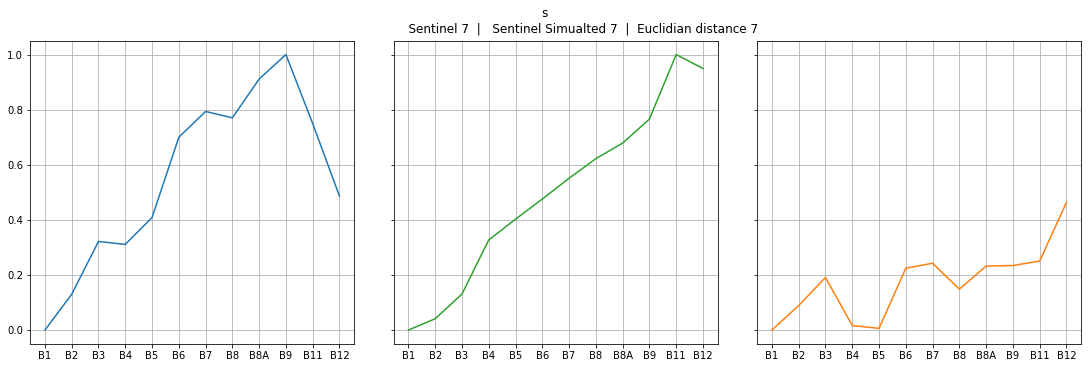

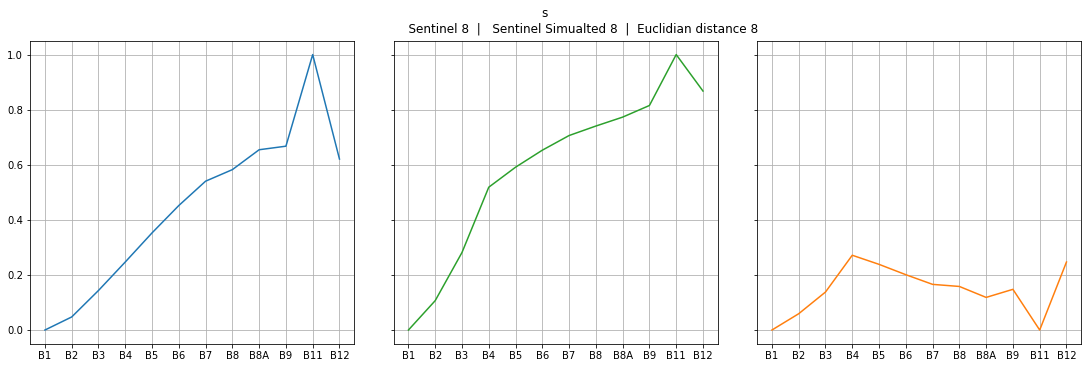

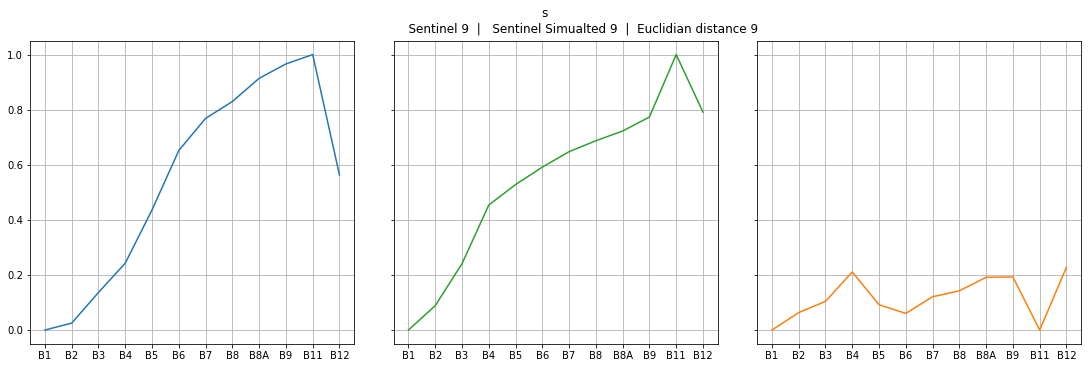

In [166]:

for col in df_soil_data_.index[:10]:
    
    fig = plt.figure(figsize=(15, 5), constrained_layout=True)
    gs = fig.add_gridspec(1, 3, hspace=.2, wspace=.1)
    
    (ax1, ax2, ax3) = gs.subplots(sharex='col', sharey='row')
    
    fig.suptitle(f's\n                    Sentinel {col}  |   Sentinel Simualted {col}  |  Euclidian distance {col}')
    
    ax1.plot(
        [i.split('_')[0] for i in df_soil_data_.columns if i.endswith('_sen')],
        df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_sen')]].loc[col],
        'tab:blue'
    )
    ax2.plot(
        [i.split('_')[0] for i in df_soil_data_.columns if i.endswith('_simsen')],
        df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_simsen')]].loc[col],
        'tab:green'
    )
    
#     print(df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_sen')]].loc[col].values)
#     print(df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_simsen')]].loc[col].values)
#     print(abs(df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_sen')]].loc[col].values - df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_simsen')]].loc[col].values))
    
    ax3.plot(
        [i.split('_')[0] for i in df_soil_data_.columns if i.endswith('_simsen')],
        abs(df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_sen')]].loc[col].values - df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_simsen')]].loc[col].values),
        'tab:orange'
    )
    
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    
    plt.show()

In [167]:
df_merge_ = df_merge[needed_cols].copy()

In [168]:
df_merge_.head()

,B1_443.9_sen,B2_496.6_sen,B3_560.0_sen,B4_664.5_sen,B5_703.9_sen,B6_740.2_sen,B7_782.5_sen,B8_835.1_sen,B8A_864.8_sen,B9_945.0_sen,B11_1613.7_sen,B12_2202.4_sen,B1_443.9_simsen,B2_496.6_simsen,B3_560.0_simsen,B4_664.5_simsen,B5_703.9_simsen,B6_740.2_simsen,B7_782.5_simsen,B8_835.1_simsen,B8A_864.8_simsen,B9_945.0_simsen,B11_1613.7_simsen,B12_2202.4_simsen
0,0.0034,0.0099,0.0324,0.0249,0.0632,0.1954,0.2388,0.2854,0.2777,0.2969,0.1356,0.0579,0.844222,0.742902,0.594799,0.455716,0.420031,0.391398,0.369552,0.357787,0.346151,0.329373,0.234380,0.312788
1,0.0001,0.0109,0.0413,0.0331,0.0947,0.2397,0.2881,0.2968,0.3334,0.3025,0.1763,0.0828,1.084577,1.024587,0.924741,0.771936,0.721580,0.679715,0.639911,0.605115,0.577240,0.531714,0.346386,0.432581
2,0.0029,0.0114,0.0404,0.0312,0.0795,0.2079,0.2486,0.2629,0.2728,0.2971,0.1621,0.0833,0.863350,0.785385,0.674149,0.543348,0.503266,0.469970,0.440225,0.420608,0.402748,0.377293,0.251452,0.300813
3,0.0063,0.0146,0.0531,0.0318,0.0891,0.2742,0.3251,0.3946,0.3670,0.2933,0.1736,0.0795,1.047152,0.976819,0.870760,0.734812,0.693970,0.661369,0.633083,0.610929,0.592339,0.563219,0.433349,0.475339
4,0.0010,0.0020,0.0178,0.0157,0.0476,0.1580,0.1912,0.1848,0.2066,0.2519,0.0977,0.0480,0.910143,0.827656,0.699175,0.537009,0.491197,0.453930,0.423285,0.403942,0.385648,0.361293,0.247524,0.295509


In [169]:
for col in df_merge_.index:
     
    ls1 = normalized_data(df_merge_[df_merge_.columns[:12]].loc[col])
    ls2 = normalized_data(1.5-df_merge_[df_merge_.columns[12:]].loc[col])

    for col2 in df_merge_.columns[:12]:
        df_merge_.loc[col, col2] = ls1[col2]
        
    for col2 in df_merge_.columns[12:]:
        df_merge_.loc[col, col2] = ls2[col2]

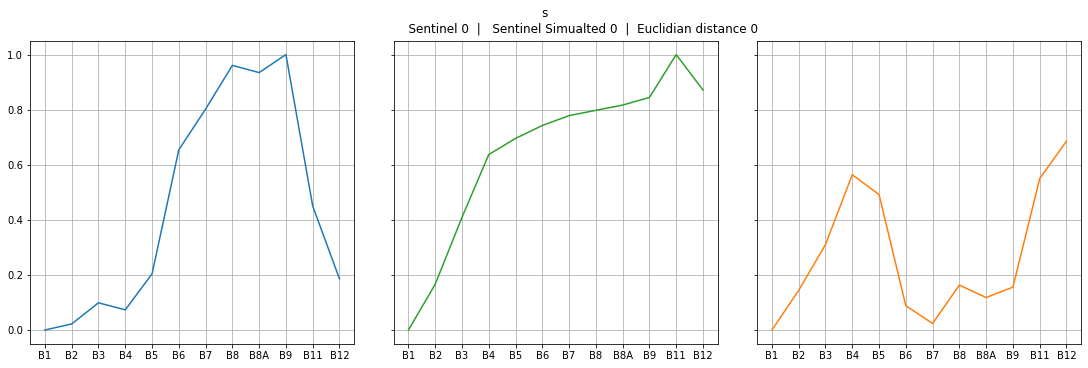

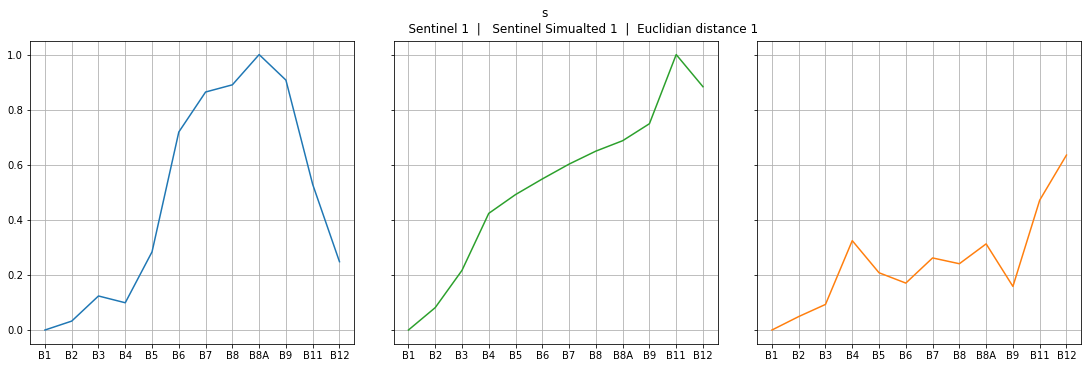

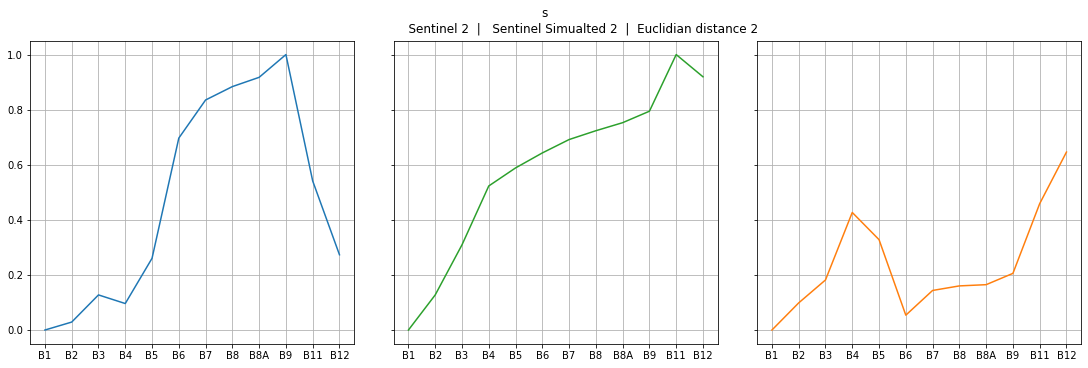

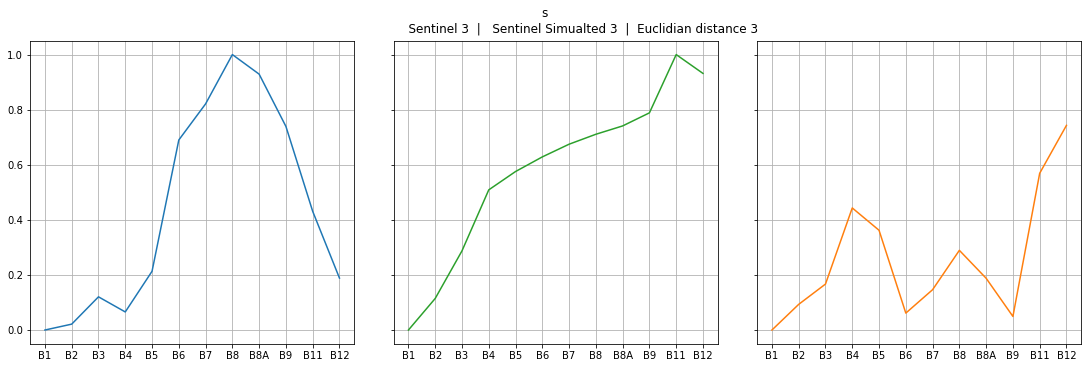

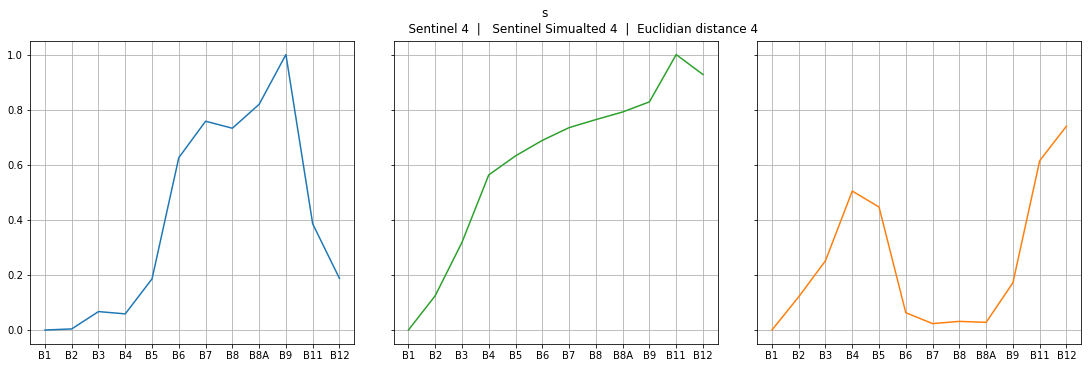

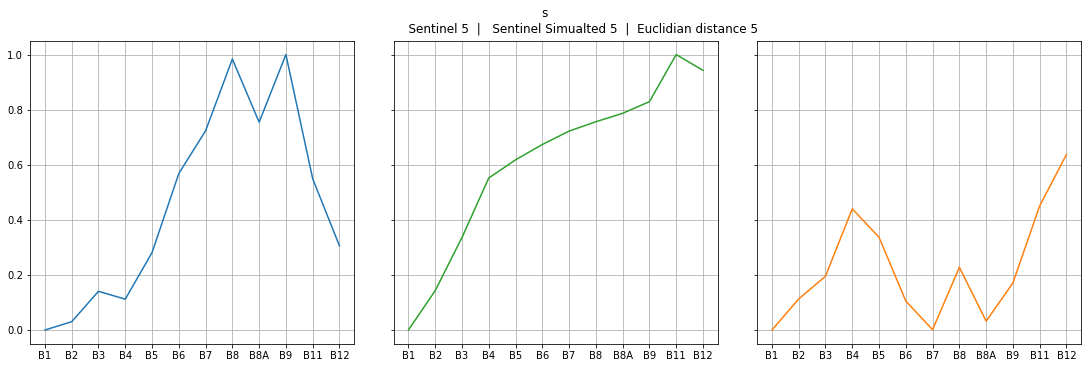

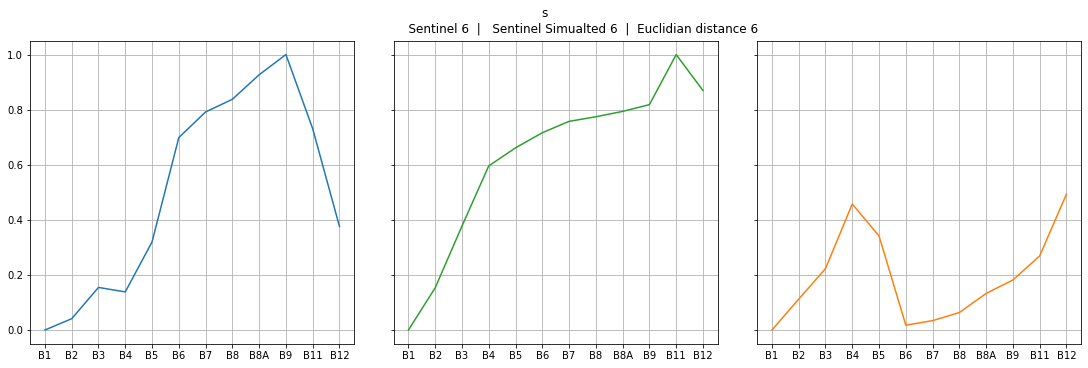

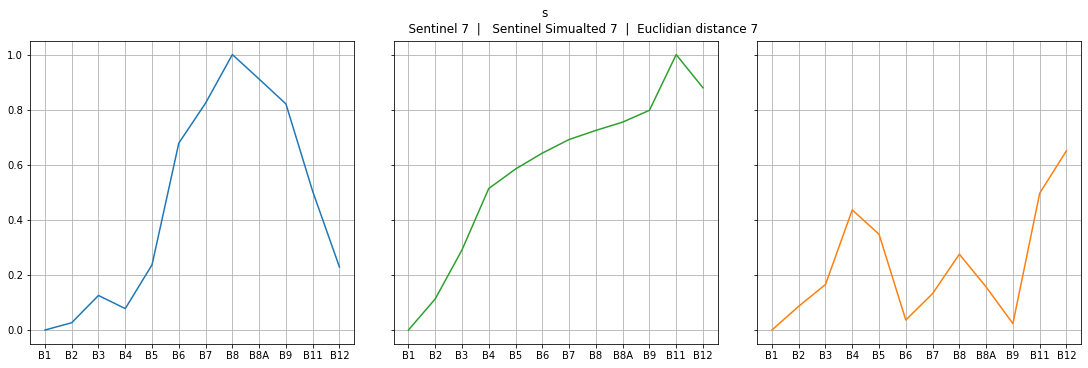

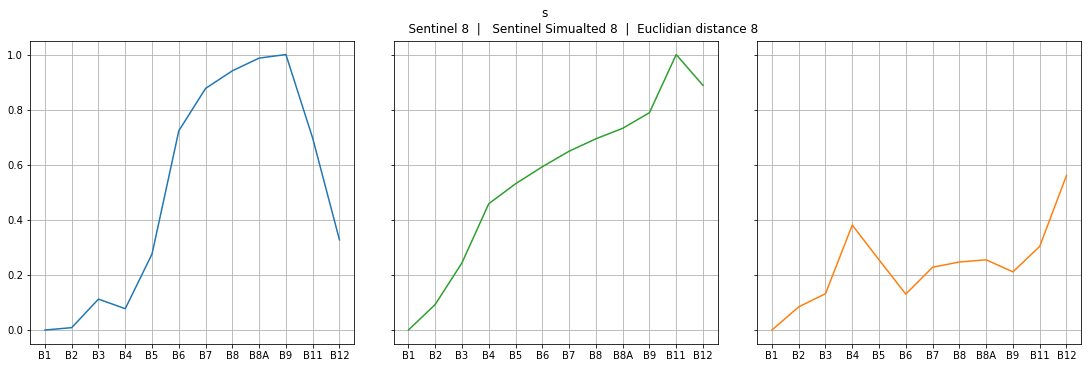

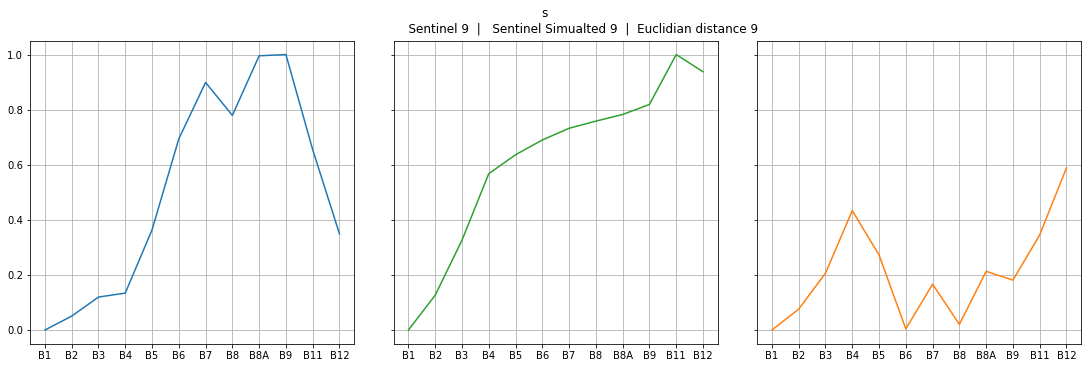

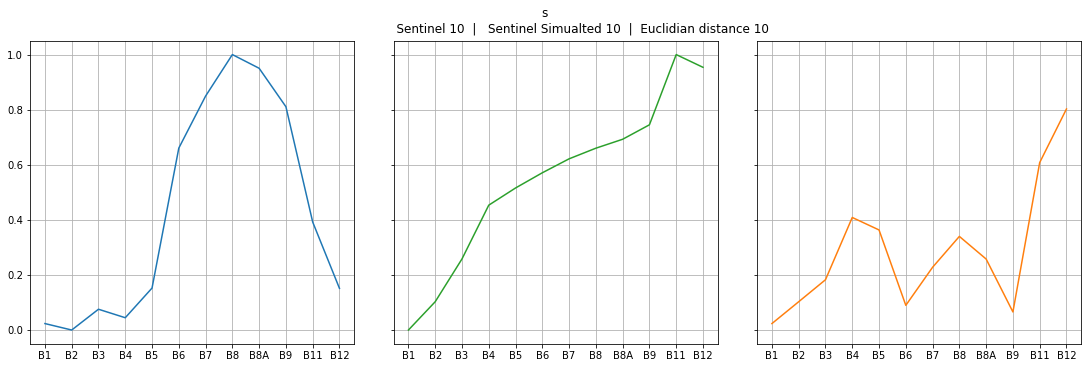

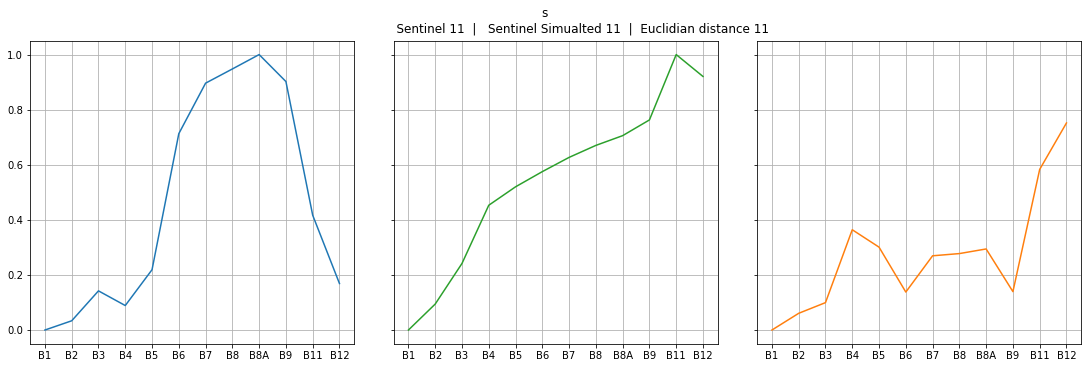

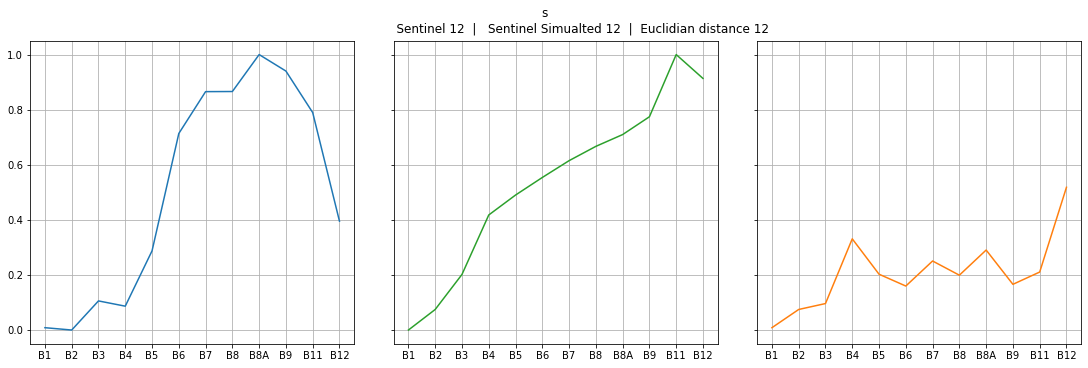

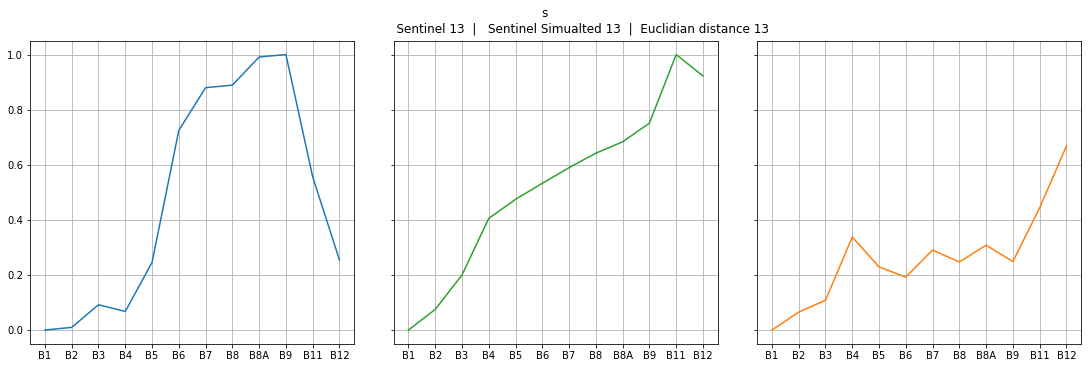

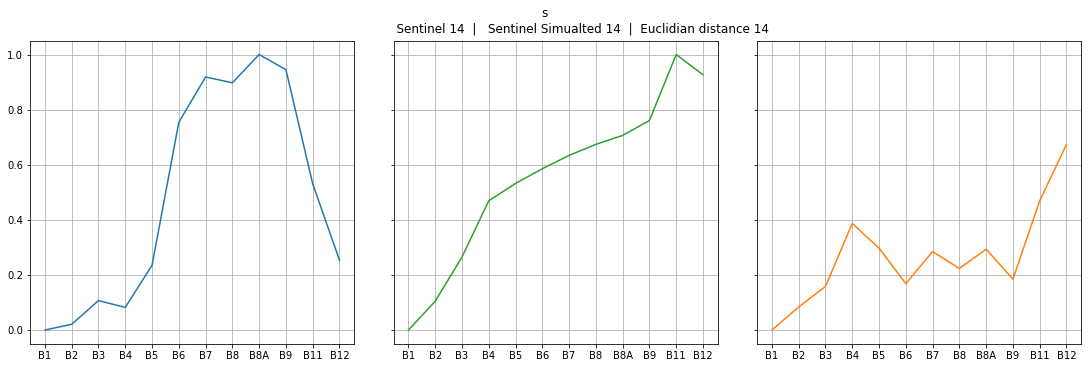

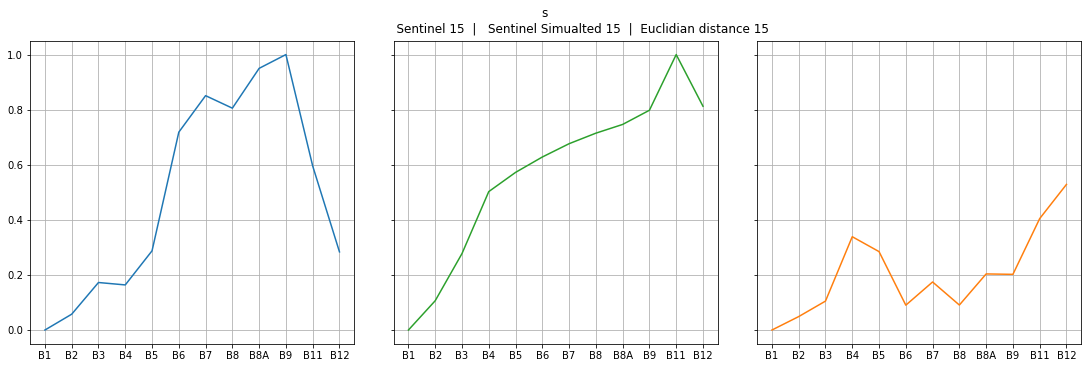

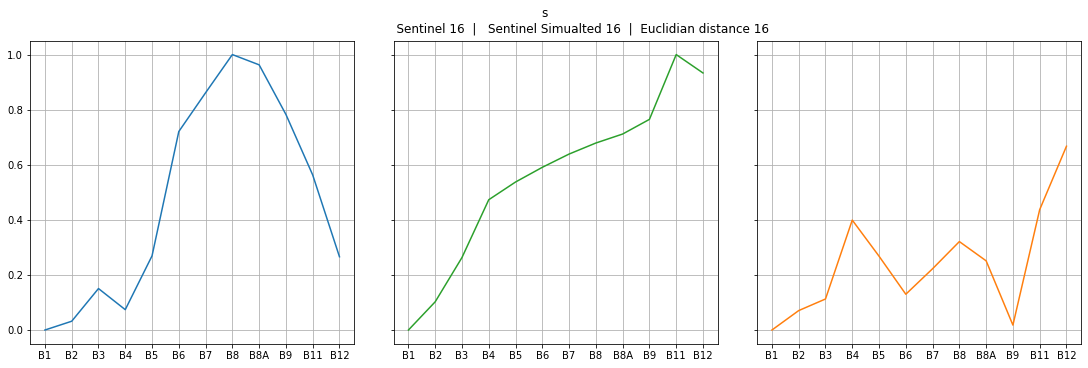

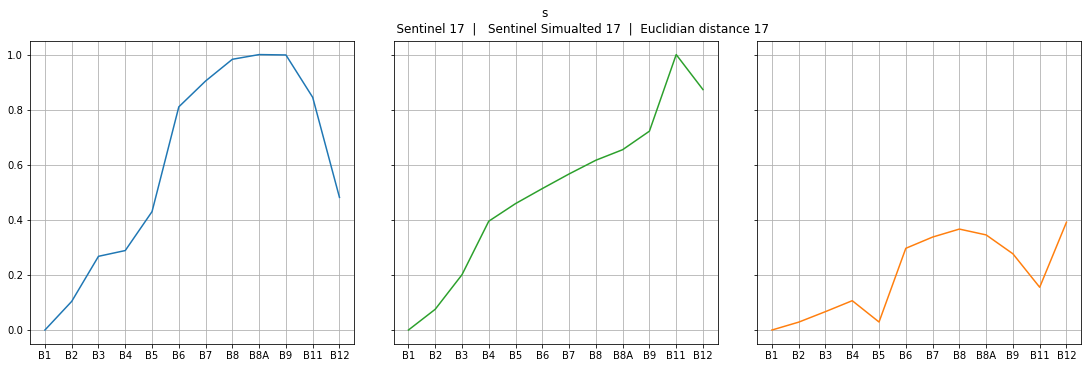

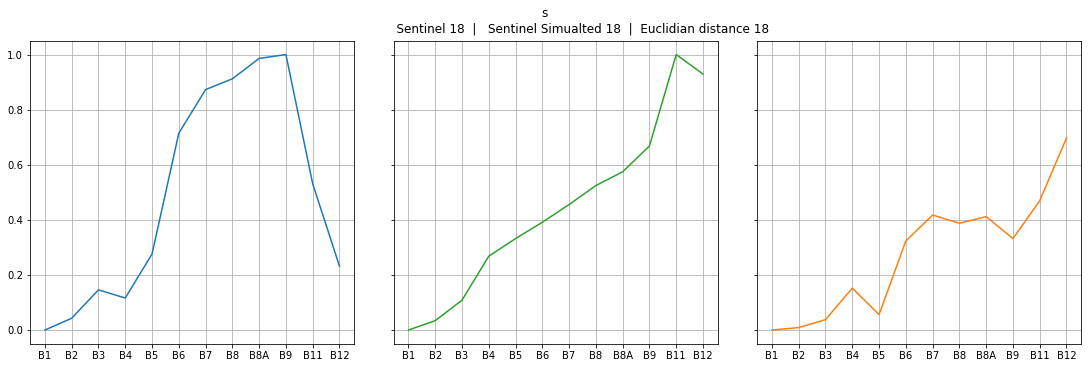

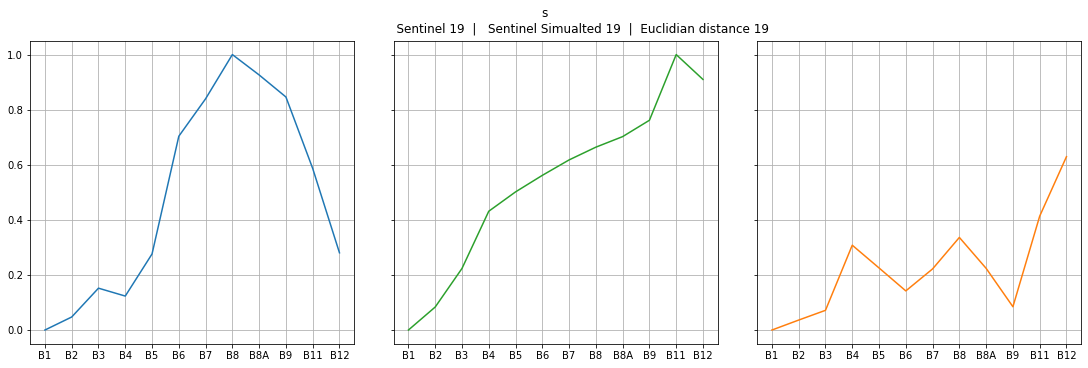

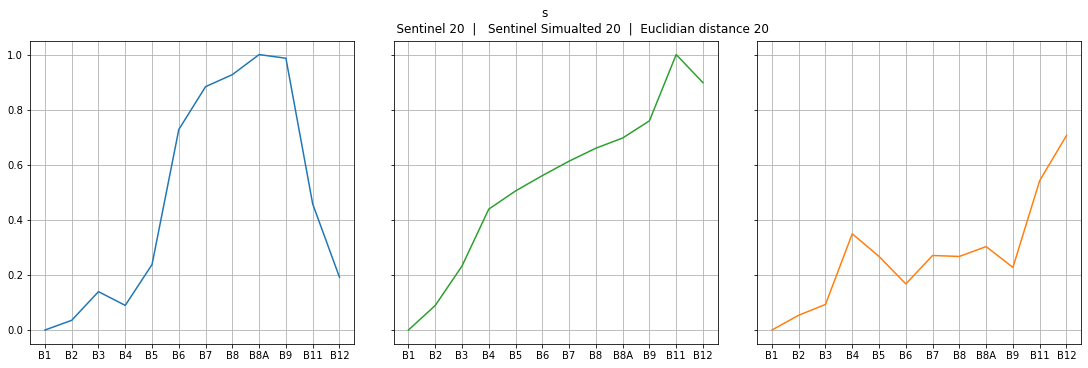

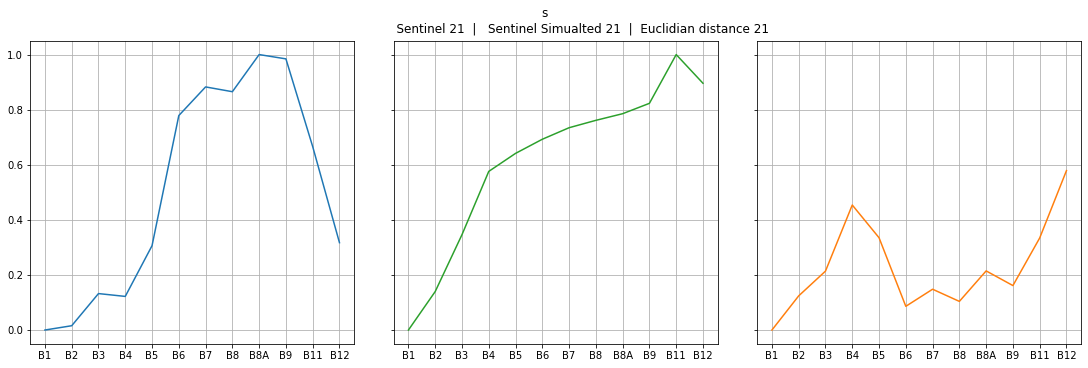

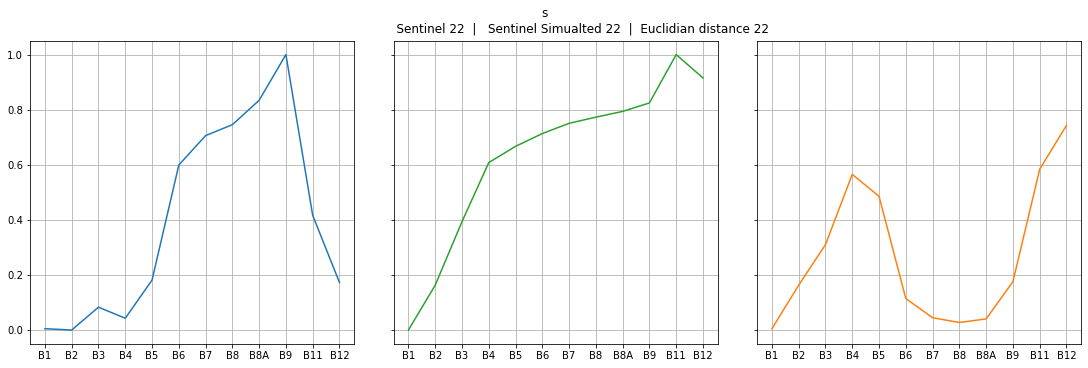

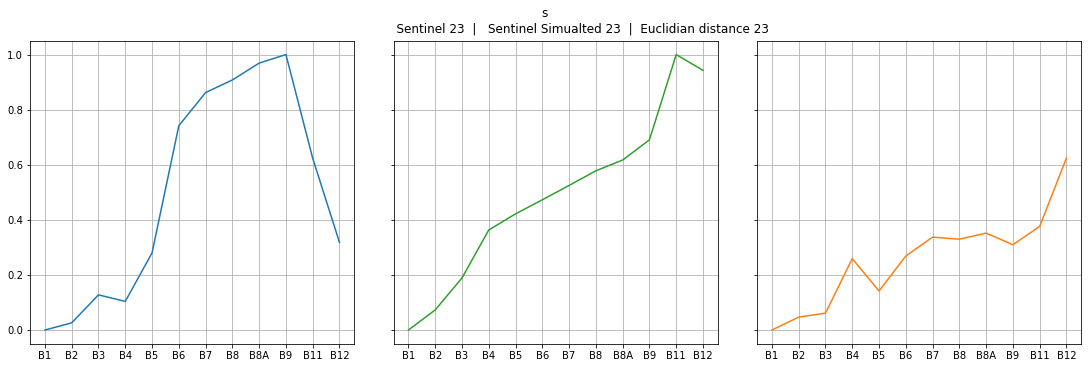

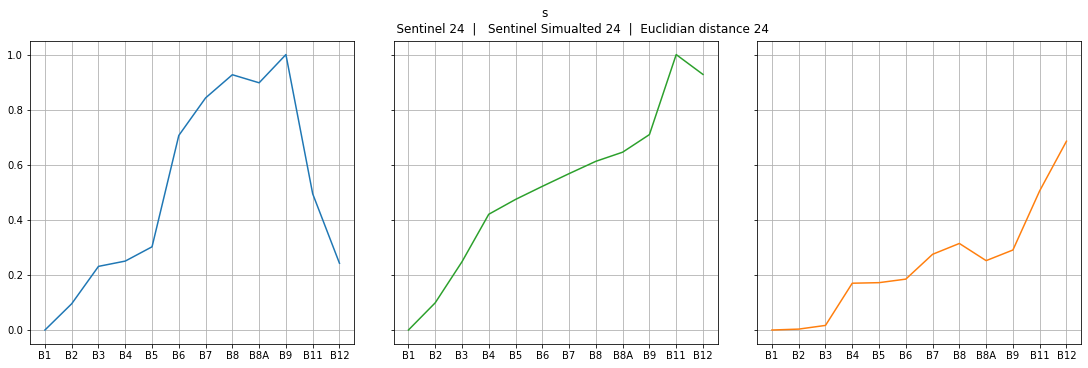

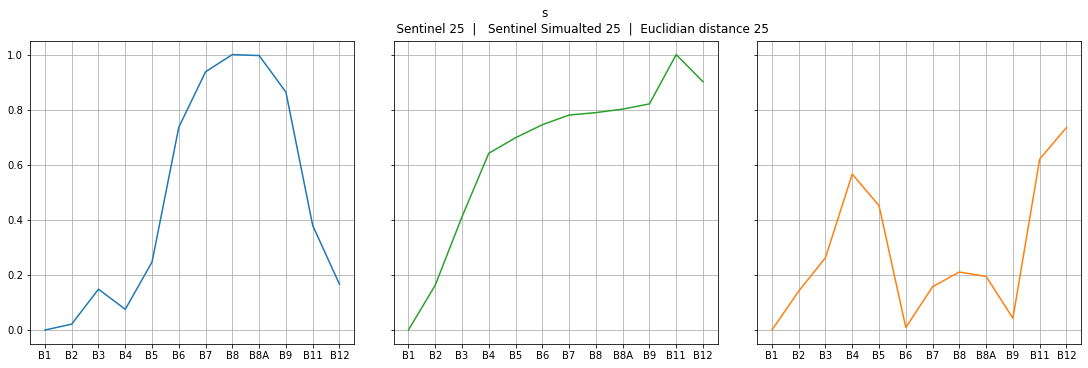

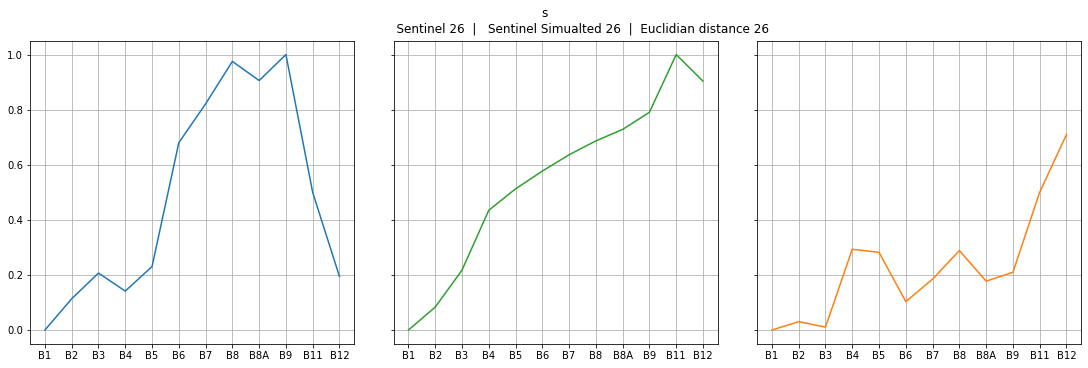

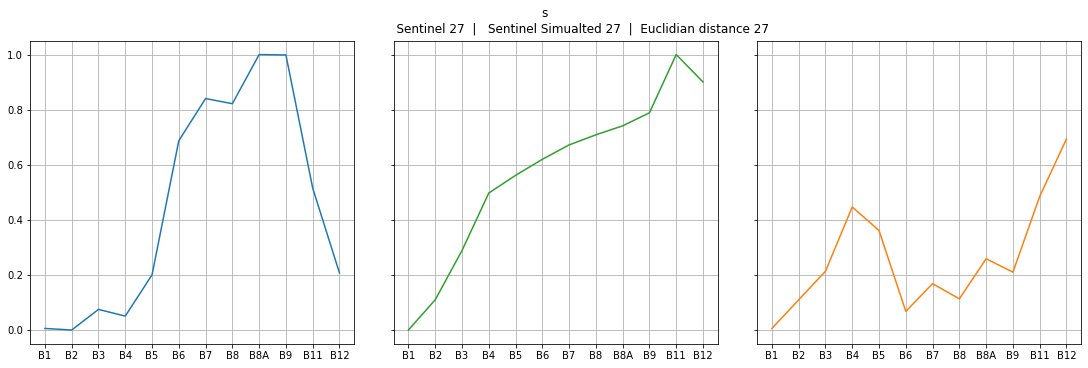

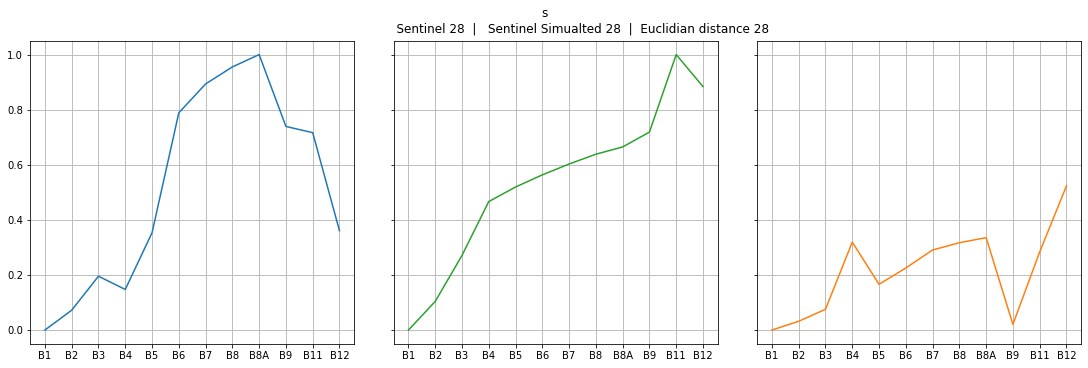

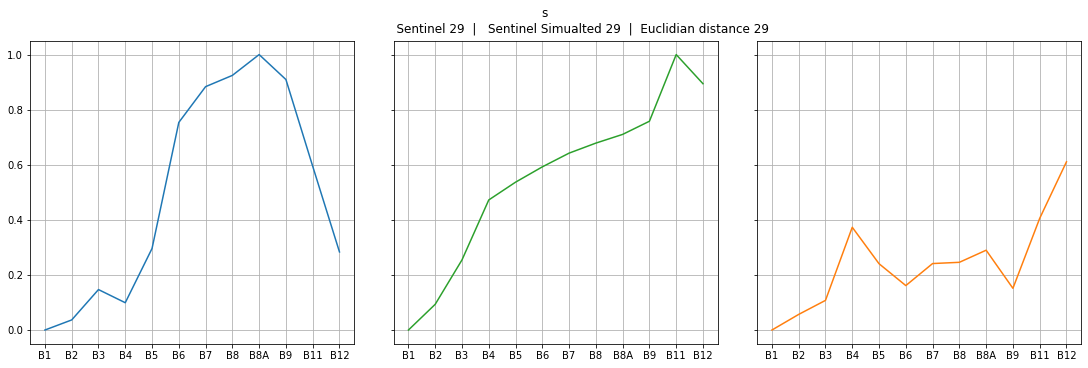

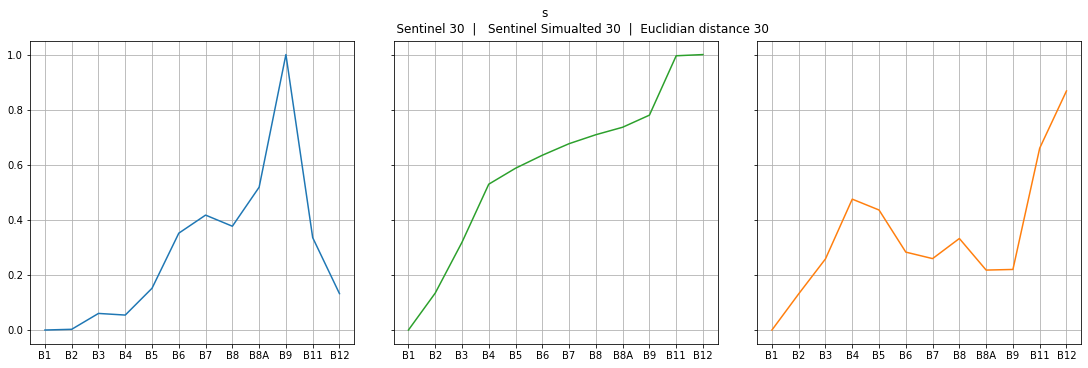

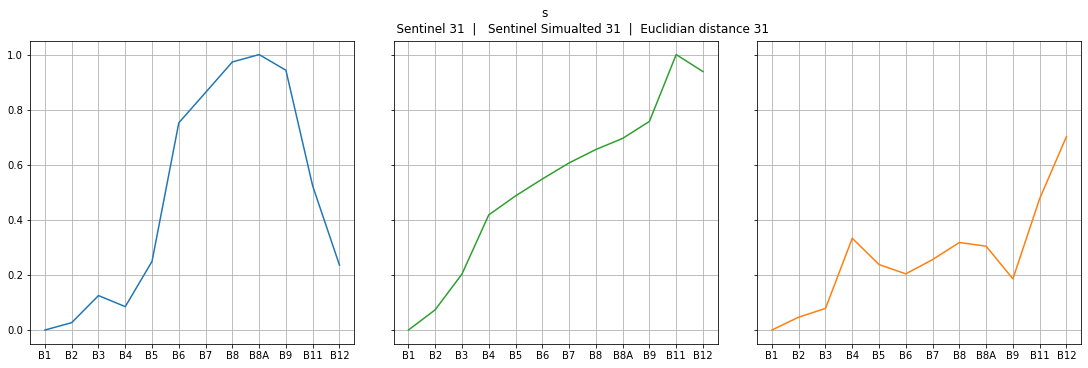

In [170]:

for col in df_merge_.index[:32]:
    
    fig = plt.figure(figsize=(15, 5), constrained_layout=True)
    gs = fig.add_gridspec(1, 3, hspace=.2, wspace=.1)
    
    (ax1, ax2, ax3) = gs.subplots(sharex='col', sharey='row')
    
    fig.suptitle(f's\n                    Sentinel {col}  |   Sentinel Simualted {col}  |  Euclidian distance {col}')
    
    ax1.plot(
        [i.split('_')[0] for i in df_merge_.columns if i.endswith('_sen')],
        df_merge_[[i for i in df_merge_.columns if i.endswith('_sen')]].loc[col],
        'tab:blue'
    )
    ax2.plot(
        [i.split('_')[0] for i in df_merge_.columns if i.endswith('_simsen')],
        df_merge_[[i for i in df_merge_.columns if i.endswith('_simsen')]].loc[col],
        'tab:green'
    )
    
#     print(df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_sen')]].loc[col].values)
#     print(df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_simsen')]].loc[col].values)
#     print(abs(df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_sen')]].loc[col].values - df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_simsen')]].loc[col].values))
    
    ax3.plot(
        [i.split('_')[0] for i in df_merge_.columns if i.endswith('_simsen')],
        abs(df_merge_[[i for i in df_merge_.columns if i.endswith('_sen')]].loc[col].values - df_merge_[[i for i in df_merge_.columns if i.endswith('_simsen')]].loc[col].values),
        'tab:orange'
    )
    
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    
    plt.show()

<AxesSubplot:>

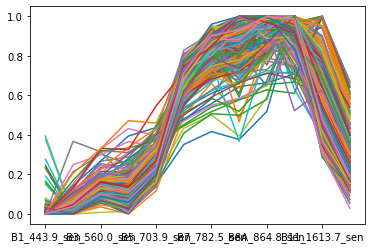

In [171]:
df_merge_[[i for i in df_merge_.columns if i.endswith('_sen')]].T.plot(legend=False)

<AxesSubplot:>

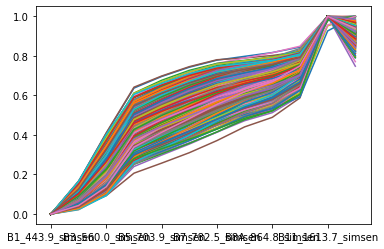

In [172]:
df_merge_[[i for i in df_merge_.columns if i.endswith('_simsen')]].T.plot(legend=False)

<AxesSubplot:>

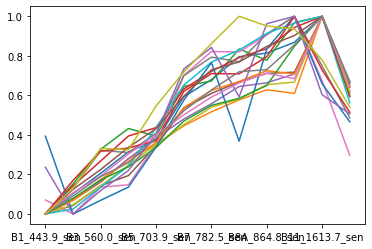

In [173]:
df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_sen')]].T.plot(legend=False)

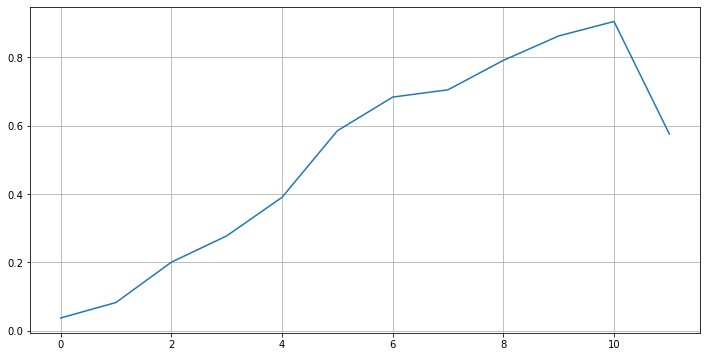

In [174]:
df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_sen')]].mean(axis=0).plot(
    figsize=(12, 6),
    legend=False,
    grid=True,
    use_index=False,
    xlabel=[i.split('_')[0] for i in df_soil_data_.columns if i.endswith('_sen')]
)
plt.show()

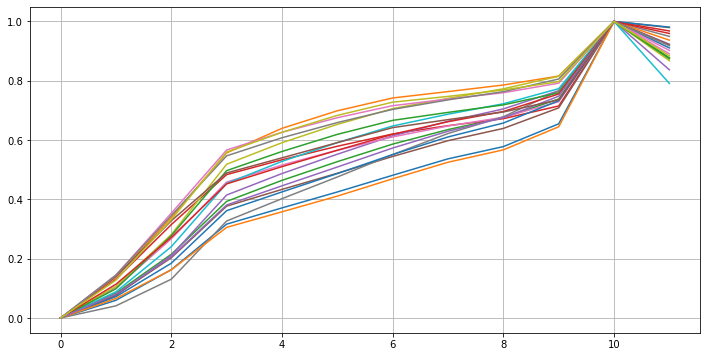

In [175]:
df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_simsen')]].T.plot(
    figsize=(12, 6),
    legend=False,
    grid=True,
    use_index=False,
    xlabel=[i.split('_')[0] for i in df_soil_data_.columns if i.endswith('_simsen')]
)
plt.show()

In [246]:
plt.rcParams['font.family'] = 'monospace'

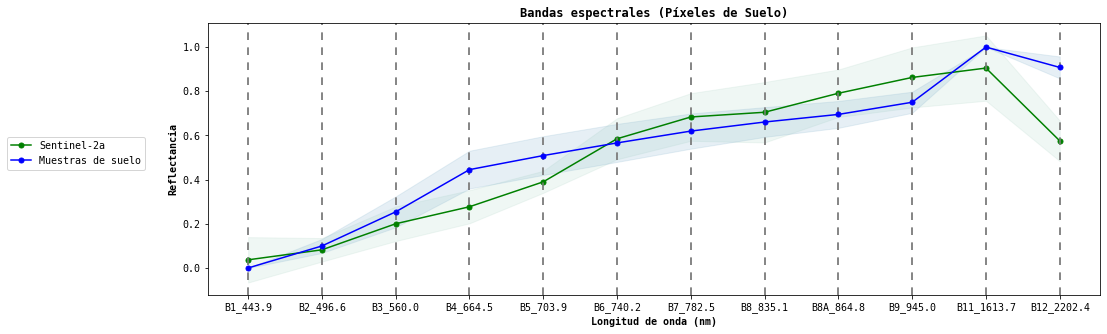

In [261]:
color = ['g', 'b']
color2 = ['#b2d7c9', '#84b3ce']

plt.figure(figsize=(16, 5));
plt.title(f'Bandas espectrales (Píxeles de Suelo)', fontweight='bold')

for j, i in enumerate(['_sen', '_simsen']):

    df_test = df_soil_data_[[k for k in df_soil_data_.columns if k.endswith(i)]].copy()
    df_test_ = pd.DataFrame(df_test.mean(axis=0), columns=['mean'])
    df_test_['std'] = df_test.std(axis=0)
    df_test_['+std'] = df_test_['mean'] + df_test_['std']
    df_test_['-std'] = df_test_['mean'] - df_test_['std']
#     display(df_test_.head())

#     plt.figure(figsize=(25, 5.5));
#     plt.title(f'Firma espectral sentinel ')
    plt.xlabel('Longitud de onda (nm)', fontweight='bold')
    plt.ylabel('Reflectancia', fontweight='bold')
#     plt.grid(True)
    
    x_labels = ["_".join(k.split('_')[:2]) for k in df_soil_data_.columns if k.endswith('_sen')]
    legend_ = 'Sentinel-2a' if i == '_sen' else 'Muestras de suelo'
    
    for k in x_labels:
        plt.axvline(x=k, linestyle=(0, (5, 5)), color='gray')
    
    plt.plot(x_labels, df_test_['mean'], color=color[j], label=legend_, marker='.', markersize=10)
    plt.fill_between(x_labels, df_test_['mean'] - df_test_['std'], df_test_['mean'] + df_test_['std'], color=color2[j], alpha=0.2)
#     plt.savefig(f'spetral_bands_classification_{categorize_bands(i)}.png')

plt.legend(bbox_to_anchor=(-0.23, 0.6), loc='upper left')
plt.show()

In [130]:
df_merge_.columns

Index(['B1_442.3_sen', 'B2_492.1_sen', 'B3_559.0_sen', 'B4_665.0_sen',
       'B5_703.8_sen', 'B6_739.1_sen', 'B7_779.7_sen', 'B8_833.0_sen',
       'B8A_864.0_sen', 'B9_943.2_sen', 'B11_1610.4_sen', 'B12_2202.4_sen',
       'B1_442.3_simsen', 'B2_492.1_simsen', 'B3_559.0_simsen',
       'B4_665.0_simsen', 'B5_703.8_simsen', 'B6_739.1_simsen',
       'B7_779.7_simsen', 'B8_833.0_simsen', 'B8A_864.0_simsen',
       'B9_943.2_simsen', 'B11_1610.4_simsen', 'B12_2202.4_simsen'],
      dtype='object')

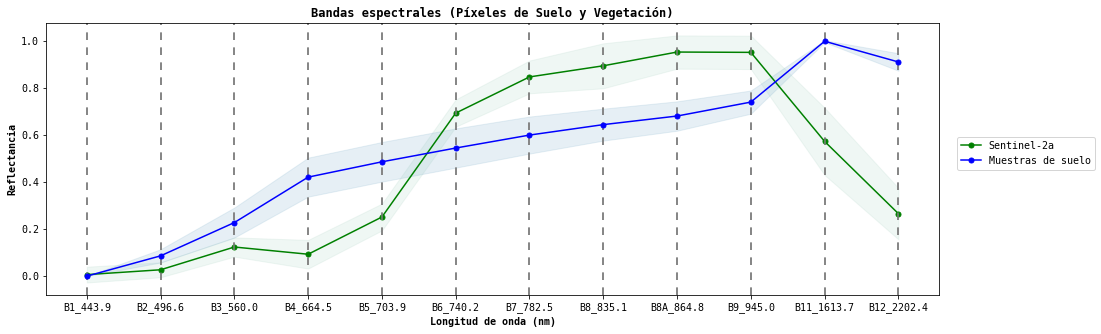

In [259]:
color = ['g', 'b']
color2 = ['#b2d7c9', '#84b3ce']

plt.figure(figsize=(16, 5));
plt.title(f'Bandas espectrales (Píxeles de Suelo y Vegetación)', fontweight='bold')

for j, i in enumerate(['_sen', '_simsen']):

    df_test = df_merge_[[k for k in df_merge_.columns if k.endswith(i)]].copy()
    df_test_ = pd.DataFrame(df_test.mean(axis=0), columns=['mean'])
    df_test_['std'] = df_test.std(axis=0)
    df_test_['+std'] = df_test_['mean'] + df_test_['std']
    df_test_['-std'] = df_test_['mean'] - df_test_['std']
#     display(df_test_.head())

#     plt.figure(figsize=(25, 5.5));
#     plt.title(f'Firma espectral sentinel ')
    plt.xlabel('Longitud de onda (nm)', fontweight='bold')
    plt.ylabel('Reflectancia', fontweight='bold')
#     plt.grid(True)
    
    x_labels = ["_".join(k.split('_')[:2]) for k in df_merge_.columns if k.endswith('_sen')]
    legend_ = 'Sentinel-2a' if i == '_sen' else 'Muestras de suelo'
    
    for k in x_labels:
        plt.axvline(x=k, linestyle=(0, (5, 5)), color='gray')
    
    plt.plot(x_labels, df_test_['mean'], color=color[j], label=legend_, marker='.', markersize=10)
    plt.fill_between(x_labels, df_test_['mean'] - df_test_['std'], df_test_['mean'] + df_test_['std'], color=color2[j], alpha=0.2)
#     plt.savefig(f'spetral_bands_classification_{categorize_bands(i)}.png')

plt.legend(bbox_to_anchor=(1.18, 0.6), loc='upper right')
plt.show()

## Kolmogorov test

In [39]:
from scipy.stats import ks_2samp
import numpy as np

np.random.seed(42)

In [40]:
df_soil_data_.head()

,B1_442.3_sen,B2_492.1_sen,B3_559.0_sen,B4_665.0_sen,B5_703.8_sen,B6_739.1_sen,B7_779.7_sen,B8_833.0_sen,B8A_864.0_sen,B9_943.2_sen,B11_1610.4_sen,B12_2202.4_sen,B1_442.3_simsen,B2_492.1_simsen,B3_559.0_simsen,B4_665.0_simsen,B5_703.8_simsen,B6_739.1_simsen,B7_779.7_simsen,B8_833.0_simsen,B8A_864.0_simsen,B9_943.2_simsen,B11_1610.4_simsen,B12_2202.4_simsen
0,0.0,0.104000,0.206154,0.314462,0.372308,0.593538,0.679692,0.795692,0.814154,0.868615,1.0,0.596308,0.0,0.059721,0.162893,0.316465,0.371192,0.424972,0.481282,0.536702,0.577928,0.654743,1.0,0.910793
1,0.0,0.068789,0.161455,0.280273,0.351052,0.446276,0.517339,0.577317,0.628482,0.610290,1.0,0.606026,0.0,0.138415,0.338803,0.556702,0.639542,0.698773,0.741943,0.763445,0.785696,0.815839,1.0,0.876389
2,0.0,0.152341,0.327705,0.432464,0.394091,0.645434,0.673062,0.834996,0.777820,0.968534,1.0,0.660399,0.0,0.083671,0.214824,0.393191,0.464130,0.527145,0.586383,0.635343,0.675846,0.738476,1.0,0.877330
3,0.0,0.143365,0.268588,0.394522,0.437211,0.632159,0.721807,0.791533,0.836357,0.943792,1.0,0.648168,0.0,0.130797,0.314969,0.483561,0.533544,0.579106,0.620542,0.648550,0.672093,0.714935,1.0,0.967987
4,0.0,0.072410,0.164935,0.279920,0.384512,0.480724,0.557828,0.644988,0.663761,0.708683,1.0,0.617499,0.0,0.075696,0.211122,0.414706,0.487101,0.552302,0.614277,0.663309,0.704982,0.766420,1.0,0.836977


In [41]:
alpha = 0.01

for j in df_soil_data_.index:
    
    print(f"index: {j}", end=', ')
    
    statistic, p_value = ks_2samp(
        df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_sen')]].loc[j],
        df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_simsen')]].loc[j]
    )
    print(f"statistic: {statistic}, p_value: {p_value}", end='; ')
    if p_value < alpha:
        print('The distributions are different')
    else:
        print('The distributions are NOT different')

index: 0, statistic: 0.3333333333333333, p_value: 0.5360977695073805; The distributions are NOT different
index: 1, statistic: 0.5833333333333334, p_value: 0.031436056203858066; The distributions are NOT different
index: 2, statistic: 0.25, p_value: 0.8689816711757754; The distributions are NOT different
index: 3, statistic: 0.25, p_value: 0.8689816711757754; The distributions are NOT different
index: 4, statistic: 0.16666666666666666, p_value: 0.9984852944874484; The distributions are NOT different
index: 5, statistic: 0.16666666666666666, p_value: 0.9984852944874484; The distributions are NOT different
index: 6, statistic: 0.25, p_value: 0.8689816711757754; The distributions are NOT different
index: 7, statistic: 0.25, p_value: 0.8689816711757754; The distributions are NOT different
index: 8, statistic: 0.4166666666666667, p_value: 0.2557751845677543; The distributions are NOT different
index: 9, statistic: 0.25, p_value: 0.8689816711757754; The distributions are NOT different
index:

<ipython-input-275-17629be8369c>:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bin_edges = np.histogram(a, bins=num_bins, normed=True)
<ipython-input-275-17629be8369c>:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bin_edges = np.histogram(a, bins=num_bins, normed=True)


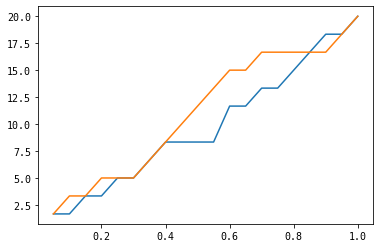

In [275]:
a = np.array( df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_sen')]].loc[0]) # your array of numbers
num_bins = 20
counts, bin_edges = np.histogram(a, bins=num_bins, normed=True)
cdf = np.cumsum(counts)
plt.plot(bin_edges[1:], cdf)


a = np.array( df_soil_data_[[i for i in df_soil_data_.columns if i.endswith('_simsen')]].loc[0]) # your array of numbers
num_bins = 20
counts, bin_edges = np.histogram(a, bins=num_bins, normed=True)
cdf = np.cumsum(counts)
plt.plot(bin_edges[1:], cdf)

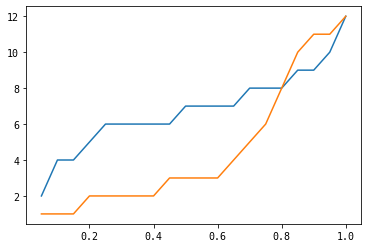

In [277]:
a = np.array( df_merge_[[i for i in df_merge_.columns if i.endswith('_sen')]].loc[0]) # your array of numbers
num_bins = 20
counts, bin_edges = np.histogram(a, bins=num_bins)
cdf = np.cumsum(counts)
plt.plot(bin_edges[1:], cdf)


a = np.array( df_merge_[[i for i in df_merge_.columns if i.endswith('_simsen')]].loc[0]) # your array of numbers
num_bins = 20
counts, bin_edges = np.histogram(a, bins=num_bins)
cdf = np.cumsum(counts)
plt.plot(bin_edges[1:], cdf)

In [279]:
counts, bin_edges

(array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1],
       dtype=int64),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]))

In [278]:
df_merge_[[i for i in df_merge_.columns if i.endswith('_sen')]].loc[0]

B1_443.9_sen      0.000000
B2_496.6_sen      0.022147
B3_560.0_sen      0.098807
B4_664.5_sen      0.073254
B5_703.9_sen      0.203748
B6_740.2_sen      0.654174
B7_782.5_sen      0.802044
B8_835.1_sen      0.960818
B8A_864.8_sen     0.934583
B9_945.0_sen      1.000000
B11_1613.7_sen    0.450426
B12_2202.4_sen    0.185690
Name: 0, dtype: float64

In [266]:
df_soil_data_.columns

Index(['B1_443.9_sen', 'B2_496.6_sen', 'B3_560.0_sen', 'B4_664.5_sen',
       'B5_703.9_sen', 'B6_740.2_sen', 'B7_782.5_sen', 'B8_835.1_sen',
       'B8A_864.8_sen', 'B9_945.0_sen', 'B11_1613.7_sen', 'B12_2202.4_sen',
       'B1_443.9_simsen', 'B2_496.6_simsen', 'B3_560.0_simsen',
       'B4_664.5_simsen', 'B5_703.9_simsen', 'B6_740.2_simsen',
       'B7_782.5_simsen', 'B8_835.1_simsen', 'B8A_864.8_simsen',
       'B9_945.0_simsen', 'B11_1613.7_simsen', 'B12_2202.4_simsen'],
      dtype='object')

In [268]:
alpha = 0.01

for j_ in df_soil_data_.columns:
    j = "_".join(j_.split('_')[:2])
    print(f"index: {j}", end=', ')
    
    statistic, p_value = ks_2samp(
        df_soil_data_[f"{j}_sen"],
        df_soil_data_[f"{j}_simsen"]
    )
    print(f"statistic: {statistic}, p_value: {p_value}", end='; ')
    if p_value < alpha:
        print('The distributions are different')
#     else:
#         print('The distributions are NOT different')

index: B1_443.9, statistic: 0.15789473684210525, p_value: 0.978077940445305; index: B2_496.6, statistic: 0.2631578947368421, p_value: 0.5379287210186275; index: B3_560.0, statistic: 0.42105263157894735, p_value: 0.06808911421959735; index: B4_664.5, statistic: 0.7368421052631579, p_value: 2.8402221176801622e-05; The distributions are different
index: B5_703.9, statistic: 0.6842105263157895, p_value: 0.00015621221647240893; The distributions are different
index: B6_740.2, statistic: 0.21052631578947367, p_value: 0.808061649945869; index: B7_782.5, statistic: 0.3157894736842105, p_value: 0.3056890512159651; index: B8_835.1, statistic: 0.42105263157894735, p_value: 0.06808911421959735; index: B8A_864.8, statistic: 0.5263157894736842, p_value: 0.009223959448847003; The distributions are different
index: B9_945.0, statistic: 0.6842105263157895, p_value: 0.00015621221647240893; The distributions are different
index: B11_1613.7, statistic: 0.3157894736842105, p_value: 0.3056890512159651; inde

In [42]:
print(df_merge_.shape)
df_merge_.head()

(607, 24)


,B1_442.3_sen,B2_492.1_sen,B3_559.0_sen,B4_665.0_sen,B5_703.8_sen,B6_739.1_sen,B7_779.7_sen,B8_833.0_sen,B8A_864.0_sen,B9_943.2_sen,B11_1610.4_sen,B12_2202.4_sen,B1_442.3_simsen,B2_492.1_simsen,B3_559.0_simsen,B4_665.0_simsen,B5_703.8_simsen,B6_739.1_simsen,B7_779.7_simsen,B8_833.0_simsen,B8A_864.0_simsen,B9_943.2_simsen,B11_1610.4_simsen,B12_2202.4_simsen
0,0.0,0.022147,0.098807,0.073254,0.203748,0.654174,0.802044,0.960818,0.934583,1.000000,0.450426,0.185690,0.0,0.166141,0.408996,0.637060,0.695575,0.742527,0.778349,0.797641,0.816721,0.844233,1.0,0.871429
1,0.0,0.032403,0.123612,0.099010,0.283828,0.718872,0.864086,0.890189,1.000000,0.907291,0.528653,0.248125,0.0,0.081266,0.216524,0.423523,0.491739,0.548452,0.602373,0.649509,0.687271,0.748943,1.0,0.883235
2,0.0,0.028892,0.127464,0.096193,0.260367,0.696805,0.835146,0.883753,0.917403,1.000000,0.541128,0.273283,0.0,0.127415,0.309203,0.522966,0.588471,0.642885,0.691496,0.723555,0.752743,0.794343,1.0,0.919331
3,0.0,0.021375,0.120525,0.065671,0.213237,0.689930,0.821015,1.000000,0.928921,0.739119,0.430852,0.188514,0.0,0.114586,0.287376,0.508860,0.575400,0.628513,0.674596,0.710689,0.740976,0.788417,1.0,0.931590
4,0.0,0.003986,0.066959,0.058589,0.185731,0.625747,0.758071,0.732563,0.819450,1.000000,0.385413,0.187326,0.0,0.124486,0.318385,0.563120,0.632258,0.688500,0.734748,0.763940,0.791548,0.828304,1.0,0.927583


In [43]:
alpha = 0.01

for j in df_merge_.index:
    
    statistic, p_value = ks_2samp(
        df_merge_[[i for i in df_merge_.columns if i.endswith('_sen')]].loc[j],
        df_merge_[[i for i in df_merge_.columns if i.endswith('_simsen')]].loc[j]
    )
    
    if p_value < alpha:
        print(f"index: {j}", end='; ')
        print(statistic, p_value)
        print('The distributions are different')
#     else:
#         print('The distributions are NOT different')

index: 30; 0.6666666666666666 0.007859014050964517
The distributions are different


In [269]:
alpha = 0.01

for j_ in df_merge_.columns:
    j = "_".join(j_.split('_')[:2])
    print(f"index: {j}", end=', ')
    
    statistic, p_value = ks_2samp(
        df_soil_data_[f"{j}_sen"],
        df_soil_data_[f"{j}_simsen"]
    )
    print(f"statistic: {statistic}, p_value: {p_value}", end='; ')
    if p_value < alpha:
        print('The distributions are different')
#     else:
#         print('The distributions are NOT different')

index: B1_443.9, statistic: 0.15789473684210525, p_value: 0.978077940445305; index: B2_496.6, statistic: 0.2631578947368421, p_value: 0.5379287210186275; index: B3_560.0, statistic: 0.42105263157894735, p_value: 0.06808911421959735; index: B4_664.5, statistic: 0.7368421052631579, p_value: 2.8402221176801622e-05; The distributions are different
index: B5_703.9, statistic: 0.6842105263157895, p_value: 0.00015621221647240893; The distributions are different
index: B6_740.2, statistic: 0.21052631578947367, p_value: 0.808061649945869; index: B7_782.5, statistic: 0.3157894736842105, p_value: 0.3056890512159651; index: B8_835.1, statistic: 0.42105263157894735, p_value: 0.06808911421959735; index: B8A_864.8, statistic: 0.5263157894736842, p_value: 0.009223959448847003; The distributions are different
index: B9_945.0, statistic: 0.6842105263157895, p_value: 0.00015621221647240893; The distributions are different
index: B11_1613.7, statistic: 0.3157894736842105, p_value: 0.3056890512159651; inde

In [44]:
# data -> etiqueta (Train/Test)

In [45]:
satellite = "sentinel2_simulated"

path = (
    f'../data/models/predictions/{satellite_}/minmax/' +
    f"/scE_d1_d2_/pH/train_prediction.csv"
)

df_temp = pd.read_csv(path, sep = ';', decimal = '.')
print(df_temp)

NameError: name 'satellite_' is not defined

## Testing models

In [ ]:
import os

def check_path(path):
    files = path.split('/')
    tmp_path = ''
    
    for file in files:
        tmp_path += f"{file}/"
        if not os.path.exists(tmp_path):
            os.mkdir(tmp_path)
        else:
            print(f'File: **{file}** exists')

sentinel2_bands = {  
    'B1': [432.3, 452.3],  
    'B2': [459.6, 524.6],  
    'B3': [541.5, 576.5],  
    'B4': [650, 680],  
    'B5': [696.3, 711.3],  
    'B6': [731.6, 746.6],  
    'B7': [769.7, 789.7],  
    'B8': [775.5, 890.5],  
    'B8A': [854, 874],  
    'B9': [933.2, 953.2],  
    'B10': [1361.9, 1391.9],  
    'B11': [1565.4, 1655.4],  
    'B12': [2112.4, 2292.4]  
}  

In [ ]:
sat_sentinel_data_unprocessed = r'../data/processed_raw/sentinel_bands/S2A_MSIL2A_20160110T152632_N0201_R025_T18NXM_20160110T153105_processed.csv'
df_temp_ = pd.read_csv(sat_sentinel_data_unprocessed, sep=';')#
df_temp_ = df_temp_[df_temp_['quality_classification'] == 'NOT_VEGETATION'][
    [
        'pH', 'OM', 'Ca', 'Mg', 'K', 'Na', 'B1', 'B2', 'B3', 'B4',
        'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12'
    ]
]
df_temp_ = df_temp_.rename(
        columns={
            i: f"{i}_{np.mean(sentinel2_bands[i])}" for i in df_temp_.columns if (len(i) > 1) and (i[1].isnumeric())
        }
    )
print(df_temp_.shape)
df_temp_.head()
# df_temp
# 

In [ ]:
# ['scE_442.3', 'scE_492.1', 'scE_559.0', 'scE_665.0', 'scE_703.8',
#        'scE_739.1', 'scE_779.7', 'scE_833.0', 'scE_864.0', 'scE_943.2',
#        'scE_1376.9', 'scE_1610.4', 'scE_2202.4', 'd1_442.3', 'd1_492.1',
#        'd1_559.0', 'd1_665.0', 'd1_703.8', 'd1_739.1', 'd1_779.7', 'd1_833.0',
#        'd1_864.0', 'd1_943.2', 'd1_1376.9', 'd1_1610.4', 'd2_442.3',
#        'd2_492.1', 'd2_559.0', 'd2_665.0', 'd2_703.8', 'd2_739.1', 'd2_779.7',
#        'd2_833.0', 'd2_864.0', 'd2_943.2', 'd2_1376.9', 'y_train',
#        'y_prd_train_']

In [ ]:
key = 'sentinel_soil'
check_path(f'../data/interim_raw/{key}')
df_temp_.to_csv(
    f'../data/interim_raw/{key}/satellite_{key}.csv',
    index=False,
    header=True,
    sep = ';',
    decimal = '.'
)

In [ ]:
# Loading libraries
#####################################################################

# Standard libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import six
import os

# Datasets
from sklearn import datasets

# Models
from sklearn.cross_decomposition import PLSRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

# Extra libraries
from IPython.display import display 
from sklearn.utils import resample
from itertools import cycle
from scipy import interp
from pickle import dump
import joblib

#####################################################################

pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 999
pd.options.display.max_columns = 999


# Properties, models and normalization methods used
#####################################################################

properties = [
    'pH',
#     'OM',
#     'Ca',
#     'Mg',
#     'K',
#     'Na'
]

models = [
    'LR',
    'SVR',
#     'LASSO',
    'PLSR2',
    'PLSR6',
    'RF'
]

model_funct = {
    'LR': LinearRegression(),
    'SVR': SVR(kernel='linear'),
    'LASSO': LassoCV(
        cv=5, random_state=0, max_iter = 30000,
        verbose = 0, n_jobs = -1 # verbose = 10
    ),
    'PLSR2': PLSRegression(n_components=2),
    'PLSR6': PLSRegression(n_components=6),
    'RF': RandomForestRegressor(
            bootstrap=True,
            max_depth=4,
            max_features='auto',
            min_samples_leaf=2,
            min_samples_split=5,
            n_estimators=72,
            verbose = 0
        )
}

scalers = [
    'wo_norm',
    'minmax',
    'standard'
]

satellites = [
#     'landsat_simulated',
#     'landsat_simulated_indices',
#     'sentinel2_simulated',
    'sentinel2_simulated_soil',
#     'sentinel2_simulated_indices',
#     'sentinel2',
#     'sentinel2_indices',
#     'sentinel2_veggi',
#     'sentinel2_veggi_indices'
#     'desis_simulated',
#     'vis_nir'
]

satellites_with_indices = [
    'landsat_simulated_indices',
    'sentinel2_simulated_indices',
    'sentinel2_indices'
]

transformations = {
    'scE_d1_d2_': ['scE_', 'd1_', 'd2_'],
    'scE_d1_d2_fft_': ['scE_', 'd1_', 'd2_', 'fft_'],
    'scE_d1_d2_fft_cr_': ['scE_', 'd1_', 'd2_', 'fft_', 'cr_']
}

indices_ = [
    'SIPI', 'ARVI', 'NDSI', 'NDWI',
    'BSI', 'NBR', 'GCI', 'MSI', 'NDMI',
    'SAVI', 'AVI', 'EVI', 'GNDVI', 'NDVI',
    'NDGI'
]

In [ ]:
def create_band_metrics():
    band_metrics = [
        'Satellite', 'Scaler', 'Features', 'Property' ,'Model', 
        'CC Train All', 'CC Test All',
        'MSE Train All', 'MSE CV All', 'MSE Test All',
        'R2 Train All', 'R2 CV All', 'R2 Test All',
        'EV Train All', 'EV CV All', 'EV Test All'
    ]

    metrics_df = pd.DataFrame(columns=band_metrics)
    return metrics_df


def calculate_metrics(metrics_df, y_train, y_prd_train_, satellite,
                      scaler, transformation, property_, model_text, scores):
 
    corr_train = round(np.corrcoef(y_train, y_prd_train_)[0, 1], 3)
    corr_test = round(np.corrcoef(y_train, y_prd_train_)[0, 1], 3)

    current_property_metrics = [
        satellite,
        scaler,
        transformation,
        property_,
        model_text,

        corr_train,
        corr_test,

        mean_squared_error(y_train, y_prd_train_).round(3),
        np.mean(scores['test_mean_squared_error']).round(3),
        mean_squared_error(y_train, y_prd_train_).round(3),

        r2_score(y_train, y_prd_train_).round(3),
        np.mean(scores['test_r2']).round(3),
        r2_score(y_train, y_prd_train_).round(3),

        explained_variance_score(y_train, y_prd_train_).round(3),
        np.mean(scores['test_explained_variance']).round(3),
        explained_variance_score(y_train, y_prd_train_).round(3)
    ]

    metrics_df.loc[metrics_df.shape[0]] = current_property_metrics

In [ ]:
for satellite in satellites:
    print(f"satellite: {satellite}")

    for scaler in scalers:
        print(f"scaler: {scaler}")

        for transformation in transformations:
#             print(f"transformation: {transformation}")

            for property_ in properties:
                print(f"property_: {property_}")
            
                metrics_df = create_band_metrics()
                
                path = (
                    f'../data/models/predictions/{satellite}/{scaler}/' +
                    f"/{transformation}/{property_}/train_prediction.csv"
                )

                df_temp = pd.read_csv(path, sep = ';', decimal = '.')
                print(df_temp.shape)
#                 print(df_temp.columns)
                display(df_temp.head())
                
                path2 = (
                    f'../data/models/input/sentinel_soil/{scaler}/' +
                    f"/All_{scaler}_d1d2_fft_feature_{property_}_.csv"
                )

                df_temp2 = pd.read_csv(path2, sep = ';', decimal = '.')
#                 print(df_temp2.columns)
                df_temp2 = df_temp2[df_temp2.columns[3:]]
                X_test = df_temp2[df_temp.columns[:-2]]
                y_test = df_temp2[df_temp2.columns[0]]
                
                
                
#                 print(X_test.shape)
#                 display(X_test.head())
                
                robust_scaler = RobustScaler()
                robust_scaler.fit(y_test.values.reshape(-1, 1))
                y_test_normalized = robust_scaler.transform(y_test.values.reshape(-1, 1))
                y_test_normalized = pd.Series(y_test_normalized.reshape(1, -1)[0])
#                 print(y_test_normalized.shape)
                
#                 print(y_test)
#                 print(y_test_normalized)
    
                for model_text in models:
                    print(f"model: {model_text}")

                    scoring = {
                        'mean_squared_error': make_scorer(mean_squared_error),
                        'r2': 'r2',
                        'explained_variance': 'explained_variance'
                    }
                    
                    model_path = (
                        f'../models/{satellite}/{scaler}/' +
                        f"/{property_}/{transformation}"
                    )

                    loaded_model = joblib.load(f"{model_path}/{model_text}_model.joblib")
#                     print(loaded_model.get_params())
                    
                    y_prd_test = loaded_model.predict(X_test)
                    
                    scores = cross_validate(loaded_model, X_test, y_test_normalized, scoring=scoring)

                    y_prd_test_ = (
                        y_prd_test if model_text not in ['PLSR2', 'PLSR6']
                        else y_prd_test[:, 0]
                    )
                    
                    calculate_metrics(
                        metrics_df, y_test_normalized, y_prd_test_,
                        satellite, scaler, transformation,
                        property_, model_text, scores
                    )
                    
                display(metrics_df)

In [ ]:
temp_df = pd.DataFrame(columns=['a', 'b'])

In [ ]:
temp_df.loc[0] = np.asarray([2, 3])

In [ ]:
temp_df